# Name: Shahzaib
# Roll Number: ME-1975
# Section: B

## Task 1: Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
df = pd.read_csv('mill.csv')
print("Dataset loaded successfully!")
print(f"\nDataset shape: {df.shape}")

Dataset loaded successfully!

Dataset shape: (180, 15)


In [4]:
print("First 5 rows:")
display(df.head())
print("\nLast 5 rows:")
display(df.tail())

First 5 rows:


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
0,1,row_0,1,1,0.00,2,1.5,0.5,1,-0.017090,0.625000,0.078125,0.314941,0.087280,0.103760
1,2,row_1,1,2,NaN,4,1.5,0.5,1,0.307617,0.668945,0.075684,0.301514,0.086670,0.099487
2,3,row_2,1,3,NaN,6,1.5,0.5,1,-0.725098,0.913086,0.083008,0.295410,0.092773,0.104980
3,4,row_3,1,4,0.11,7,1.5,0.5,1,0.112305,0.131836,0.083008,0.316162,0.112915,0.139771
4,5,row_4,1,5,NaN,11,1.5,0.5,1,-0.122070,0.449219,0.107422,0.284424,0.095825,0.110474



Last 5 rows:


,S.no,Unnamed: 1,case,run,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
175,176,row_164,16,4,NaN,4,1.50,0.50,2,0.244141,1.328125,0.063477,0.290527,0.101318,0.117798
176,177,row_165,16,5,0.40,6,1.50,0.50,2,-0.205078,1.381836,0.068359,0.289307,0.098877,0.114746
177,178,row_166,16,6,0.62,9,1.50,0.50,2,-0.380859,1.381836,0.041504,0.292969,0.075684,0.083008
178,179,row_153,14,10,1.14,24,0.75,0.50,2,0.253906,1.406250,0.083008,0.274658,0.092773,0.111084
179,180,row_154,15,1,NaN,1,1.50,0.25,2,-0.458984,1.357422,0.068359,0.292969,0.086060,0.104980


In [5]:
print("Data Types:")
print(df.dtypes)
print("\nData Info:")
df.info()

Data Types:
S.no             int64
Unnamed: 1      object
case             int64
run              int64
VB             float64
time             int64
DOC            float64
feed           float64
material         int64
smcAC          float64
smcDC          float64
vib_table      float64
vib_spindle    float64
AE_table       float64
AE_spindle     float64
dtype: object

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S.no         180 non-null    int64  
 1   Unnamed: 1   180 non-null    object 
 2   case         180 non-null    int64  
 3   run          180 non-null    int64  
 4   VB           157 non-null    float64
 5   time         180 non-null    int64  
 6   DOC          180 non-null    float64
 7   feed         180 non-null    float64
 8   material     180 non-null    int64  
 9   smcAC        175 non-null    float64
 10  smc

In [6]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nColumn names: {list(df.columns)}")

Number of rows: 180
Number of columns: 15

Column names: ['S.no', 'Unnamed: 1', 'case', 'run', 'VB', 'time', 'DOC', 'feed', 'material', 'smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']


## Task 2: Data Cleaning

Missing values per column:
             Missing Values  Percentage
VB                       23   12.777778
smcAC                     5    2.777778
smcDC                     1    0.555556
vib_table                 2    1.111111
vib_spindle               4    2.222222
AE_table                  2    1.111111
AE_spindle                1    0.555556


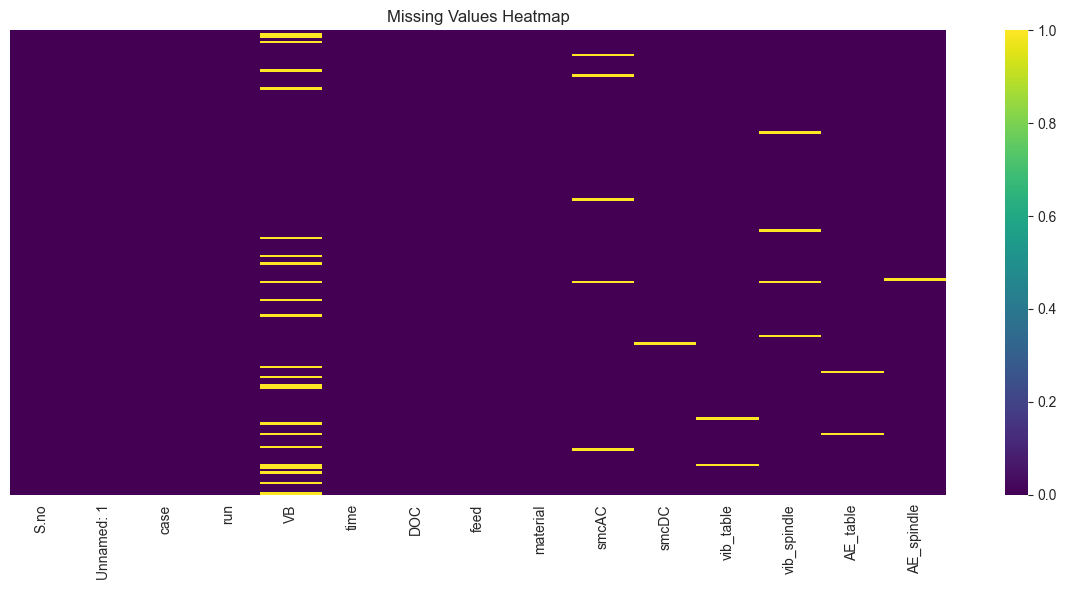

In [7]:
print("Missing values per column:")
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Values'] > 0])

plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

In [8]:
original_shape = df.shape

df['VB'] = df['VB'].fillna(method='ffill')

numerical_cols = ['smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']

for col in numerical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

print("Missing values after filling:")
print(df.isnull().sum())
print(f"\nDataset shape after handling missing values: {df.shape}")

Missing values after filling:
S.no           0
Unnamed: 1     0
case           0
run            0
VB             0
time           0
DOC            0
feed           0
material       0
smcAC          0
smcDC          0
vib_table      0
vib_spindle    0
AE_table       0
AE_spindle     0
dtype: int64

Dataset shape after handling missing values: (180, 15)


### Explain how you handled missing values here.

**Missing Value Handling Strategy:**

1. **Tool Wear (VB)**: Used forward fill method because tool wear is cumulative - the tool doesn't suddenly become unworn, so missing values logically should carry the previous measurement forward.

2. **Sensor Readings (smcAC, smcDC, vib_table, vib_spindle, AE_table, AE_spindle)**: Used median imputation because:
   - These are continuous measurements from sensors
   - Median is robust to outliers (which sensors often produce)
   - It preserves the central tendency of the data distribution
   - Mean could be skewed by extreme sensor readings

3. **Rationale**: This approach maintains data integrity while avoiding bias that could affect machine learning model performance.

In [9]:

duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print("\nDuplicate rows:")
    display(df[df.duplicated(keep=False)])

Number of duplicate rows: 0


In [10]:

df_original_len = len(df)
df = df.drop_duplicates()
print(f"Removed {df_original_len - len(df)} duplicate rows")
print(f"Dataset shape after removing duplicates: {df.shape}")

Removed 0 duplicate rows
Dataset shape after removing duplicates: (180, 15)


## Task 3: Statistical Analysis

### Center (Mean, Median, Mode)

In [11]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

analysis_cols = [col for col in numerical_columns if col not in ['S.no', 'case', 'run']]

center_stats = pd.DataFrame({
    'Mean': df[analysis_cols].mean(),
    'Median': df[analysis_cols].median(),
    'Mode': df[analysis_cols].mode().iloc[0] if len(df[analysis_cols].mode()) > 0 else np.nan
})

print("\nCenter Measures (Mean, Median, Mode):")
display(center_stats.round(4))


Center Measures (Mean, Median, Mode):


,Mean,Median,Mode
VB,0.3526,0.2800,0.0000
time,25.5833,19.0000,3.0000
DOC,1.0375,0.7500,0.7500
feed,0.3722,0.2500,0.2500
material,1.3556,1.0000,1.0000
smcAC,-0.1658,-0.1831,-0.1831
smcDC,1.3395,1.3721,1.3818
vib_table,0.0792,0.0684,0.0684
vib_spindle,0.2874,0.2856,0.2856
AE_table,0.1004,0.1013,0.0928


### Is tool wear normally distributed? Is the mean close to the median?

**Analysis:**

Tool Wear (VB) Statistics:
Mean: 0.3526
Median: 0.2800
Difference: 0.0726
Standard Deviation: 0.2854
Skewness: 1.5678

Shapiro-Wilk Test:
Statistic: 0.8746
P-value: 0.0000


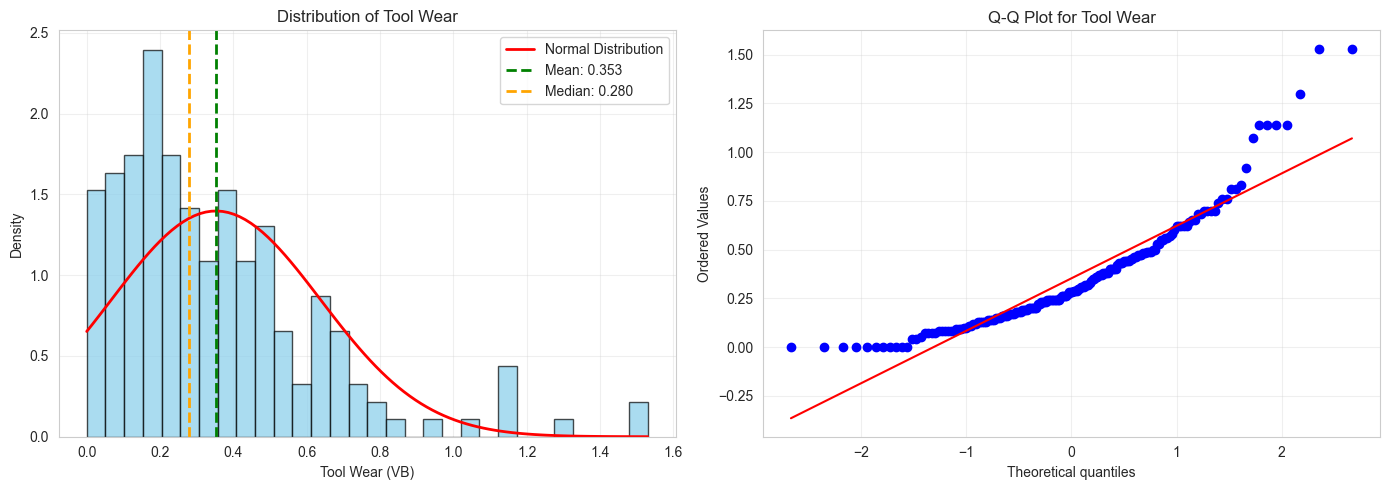


INTERPRETATION:
✗ Tool wear is NOT normally distributed (p < 0.05)
✗ Mean and median differ by 20.58%
✗ Distribution is right-skewed (skewness: 1.568)


In [12]:
vb_mean = df['VB'].mean()
vb_median = df['VB'].median()
vb_std = df['VB'].std()
vb_skewness = df['VB'].skew()

print(f"Tool Wear (VB) Statistics:")
print(f"Mean: {vb_mean:.4f}")
print(f"Median: {vb_median:.4f}")
print(f"Difference: {abs(vb_mean - vb_median):.4f}")
print(f"Standard Deviation: {vb_std:.4f}")
print(f"Skewness: {vb_skewness:.4f}")

from scipy.stats import shapiro, normaltest
shapiro_stat, shapiro_p = shapiro(df['VB'].dropna())
print(f"\nShapiro-Wilk Test:")
print(f"Statistic: {shapiro_stat:.4f}")
print(f"P-value: {shapiro_p:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['VB'].dropna(), bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
mu, sigma = df['VB'].mean(), df['VB'].std()
x = np.linspace(df['VB'].min(), df['VB'].max(), 100)
axes[0].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal Distribution')
axes[0].axvline(vb_mean, color='green', linestyle='--', linewidth=2, label=f'Mean: {vb_mean:.3f}')
axes[0].axvline(vb_median, color='orange', linestyle='--', linewidth=2, label=f'Median: {vb_median:.3f}')
axes[0].set_xlabel('Tool Wear (VB)')
axes[0].set_ylabel('Density')
axes[0].set_title('Distribution of Tool Wear')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

stats.probplot(df['VB'].dropna(), dist="norm", plot=axes[1])
axes[1].set_title('Q-Q Plot for Tool Wear')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("INTERPRETATION:")
print("="*50)

if shapiro_p > 0.05:
    print("✓ Tool wear appears to be normally distributed (p > 0.05)")
else:
    print("✗ Tool wear is NOT normally distributed (p < 0.05)")

diff_percentage = abs(vb_mean - vb_median) / vb_mean * 100
if diff_percentage < 5:
    print(f"✓ Mean and median are very close (difference: {diff_percentage:.2f}%)")
else:
    print(f"✗ Mean and median differ by {diff_percentage:.2f}%")

if abs(vb_skewness) < 0.5:
    print(f"✓ Distribution is approximately symmetric (skewness: {vb_skewness:.3f})")
elif vb_skewness > 0:
    print(f"✗ Distribution is right-skewed (skewness: {vb_skewness:.3f})")
else:
    print(f"✗ Distribution is left-skewed (skewness: {vb_skewness:.3f})")

### Spread (Variation)

In [14]:
# Calculate spread measures
spread_stats = pd.DataFrame({
    'Std Dev': df[analysis_cols].std(),
    'Variance': df[analysis_cols].var(),
    'Range': df[analysis_cols].max() - df[analysis_cols].min(),
    'IQR': df[analysis_cols].quantile(0.75) - df[analysis_cols].quantile(0.25),
    'CV (%)': (df[analysis_cols].std() / df[analysis_cols].mean() * 100)
})

print("\nSpread Measures:")
display(spread_stats.round(4))


Spread Measures:


,Std Dev,Variance,Range,IQR,CV (%)
VB,0.2854,0.0815,1.5300,0.3150,80.9582
time,22.8307,521.2388,105.0000,32.0000,89.2403
DOC,0.3657,0.1337,0.7500,0.7500,35.2449
feed,0.1253,0.0157,0.2500,0.2500,33.6674
material,0.4800,0.2304,1.0000,1.0000,35.4111
smcAC,0.3465,0.1200,1.1768,0.6897,-208.9599
smcDC,0.1828,0.0334,1.4502,0.0403,13.6483
vib_table,0.0361,0.0013,0.2930,0.0220,45.5746
vib_spindle,0.0206,0.0004,0.1843,0.0220,7.1615
AE_table,0.0240,0.0006,0.1495,0.0220,23.8832


### Which sensor shows the highest variability?


Sensor Variability (Coefficient of Variation):
vib_table       45.574593
AE_table        23.883218
AE_spindle      16.909424
smcDC           13.648341
vib_spindle      7.161465
smcAC         -208.959880
Name: CV (%), dtype: float64

Highest Variability: vib_table
Coefficient of Variation: 45.57%


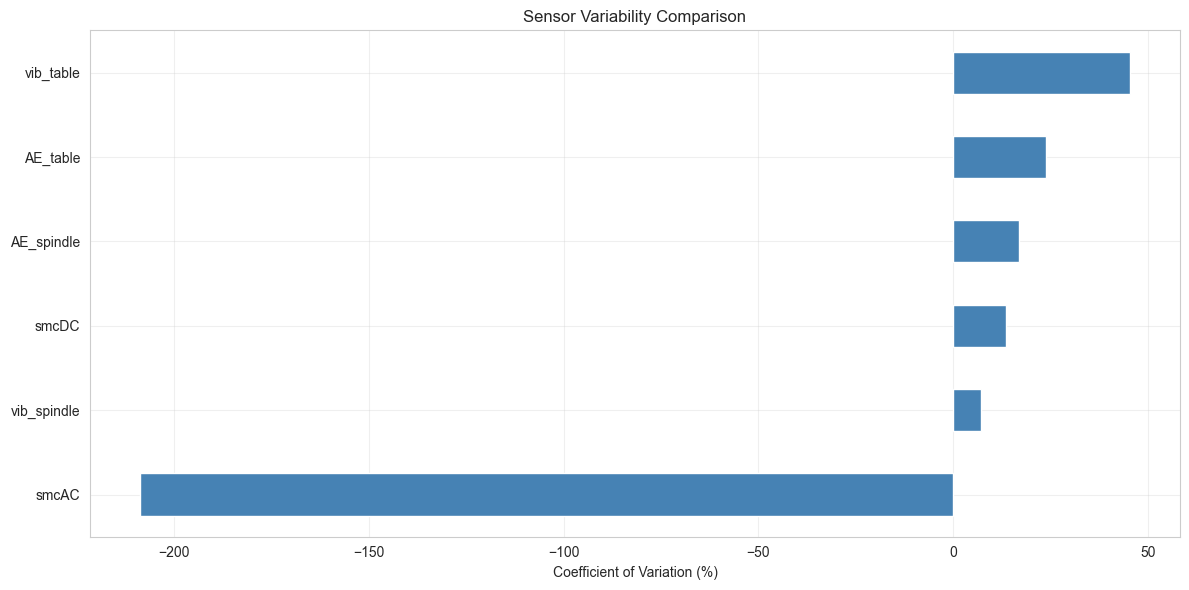

In [15]:
sensor_cols = ['smcAC', 'smcDC', 'vib_table', 'vib_spindle', 'AE_table', 'AE_spindle']
sensor_variability = spread_stats.loc[sensor_cols, 'CV (%)']

print("\nSensor Variability (Coefficient of Variation):")
print(sensor_variability.sort_values(ascending=False))

highest_var_sensor = sensor_variability.idxmax()
highest_var_value = sensor_variability.max()

print(f"\n{'='*50}")
print(f"Highest Variability: {highest_var_sensor}")
print(f"Coefficient of Variation: {highest_var_value:.2f}%")
print(f"{'='*50}")

plt.figure(figsize=(12, 6))
sensor_variability.sort_values().plot(kind='barh', color='steelblue')
plt.xlabel('Coefficient of Variation (%)')
plt.title('Sensor Variability Comparison')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Does vibration vary more than current?

**Analysis:**

Average Coefficient of Variation:
Vibration Sensors: 26.37%
Current Sensors: -97.66%

Difference: 124.02%

YES, vibration varies MORE than current by -127.0%


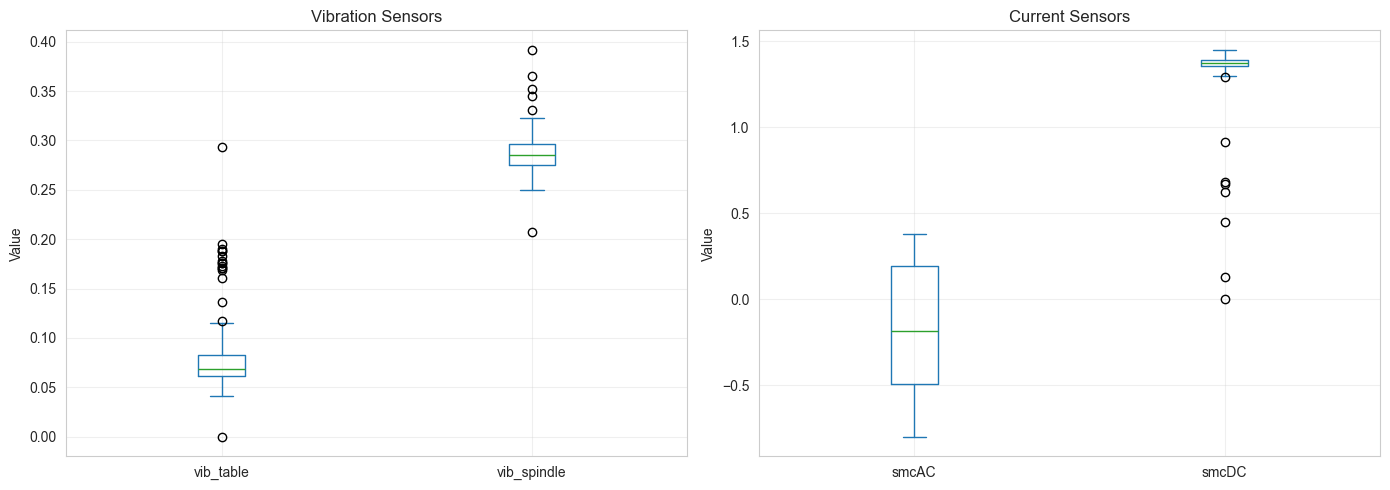

In [16]:
# Compare vibration vs current sensors
vibration_sensors = ['vib_table', 'vib_spindle']
current_sensors = ['smcAC', 'smcDC']

vib_avg_cv = spread_stats.loc[vibration_sensors, 'CV (%)'].mean()
current_avg_cv = spread_stats.loc[current_sensors, 'CV (%)'].mean()

print("Average Coefficient of Variation:")
print(f"Vibration Sensors: {vib_avg_cv:.2f}%")
print(f"Current Sensors: {current_avg_cv:.2f}%")
print(f"\nDifference: {abs(vib_avg_cv - current_avg_cv):.2f}%")

if vib_avg_cv > current_avg_cv:
    print(f"\nYES, vibration varies MORE than current by {((vib_avg_cv/current_avg_cv - 1)*100):.1f}%")
else:
    print(f"\nNO, current varies MORE than vibration by {((current_avg_cv/vib_avg_cv - 1)*100):.1f}%")

# Detailed comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Box plots
df[vibration_sensors].plot(kind='box', ax=axes[0])
axes[0].set_title('Vibration Sensors')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)

df[current_sensors].plot(kind='box', ax=axes[1])
axes[1].set_title('Current Sensors')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Shape (Distribution)

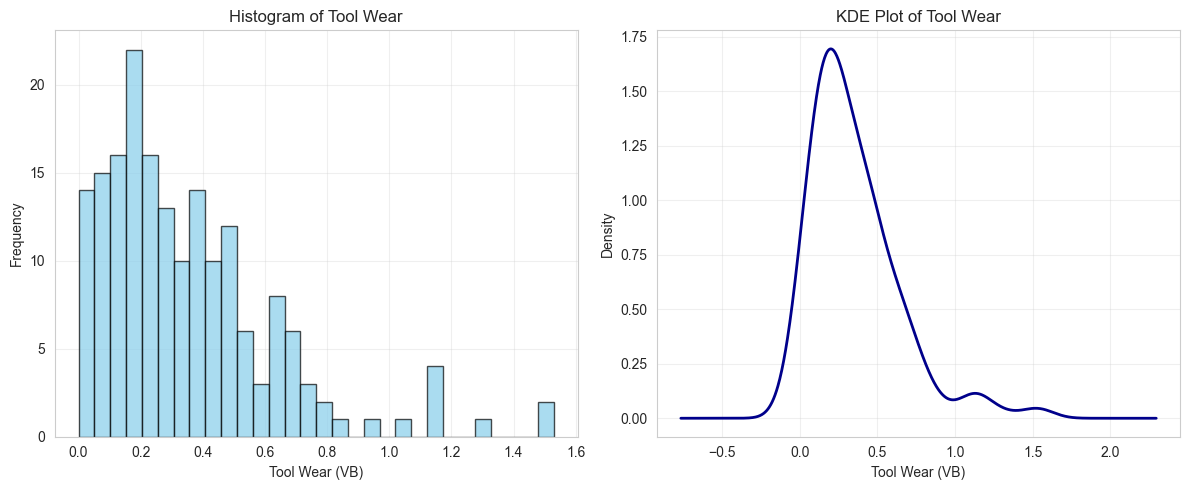

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['VB'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Tool Wear (VB)')
plt.ylabel('Frequency')
plt.title('Histogram of Tool Wear')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
df['VB'].plot(kind='kde', color='darkblue', linewidth=2)
plt.xlabel('Tool Wear (VB)')
plt.ylabel('Density')
plt.title('KDE Plot of Tool Wear')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

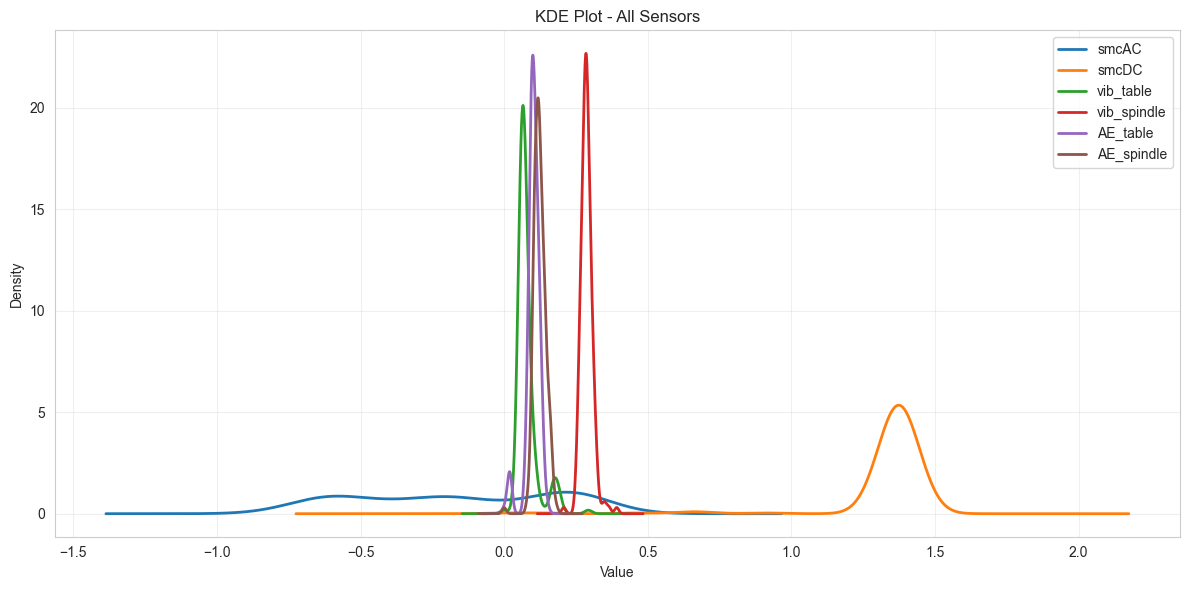

In [18]:
# KDE Plot
plt.figure(figsize=(12, 6))
for col in sensor_cols:
    df[col].plot(kind='kde', label=col, linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('KDE Plot - All Sensors')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Is the distribution symmetric, skewed, or multi-modal?

**Analysis:**

Shape Statistics:


,Skewness,Kurtosis
VB,1.5678,3.2722
time,1.1220,0.8695
DOC,0.4840,-1.7858
feed,0.0448,-2.0206
material,0.6086,-1.6481
smcAC,-0.0890,-1.4118
smcDC,-5.4302,31.3777
vib_table,2.6451,8.8776
vib_spindle,0.9959,5.1577
AE_table,-1.8896,5.3835



TOOL WEAR DISTRIBUTION ANALYSIS:
Skewness: 1.5678
Kurtosis: 3.2722

Shape: The distribution is right-skewed (positive skew)
Tails: The distribution is leptokurtic (heavy tails)
Modality: The distribution is multimodal (4 peaks)


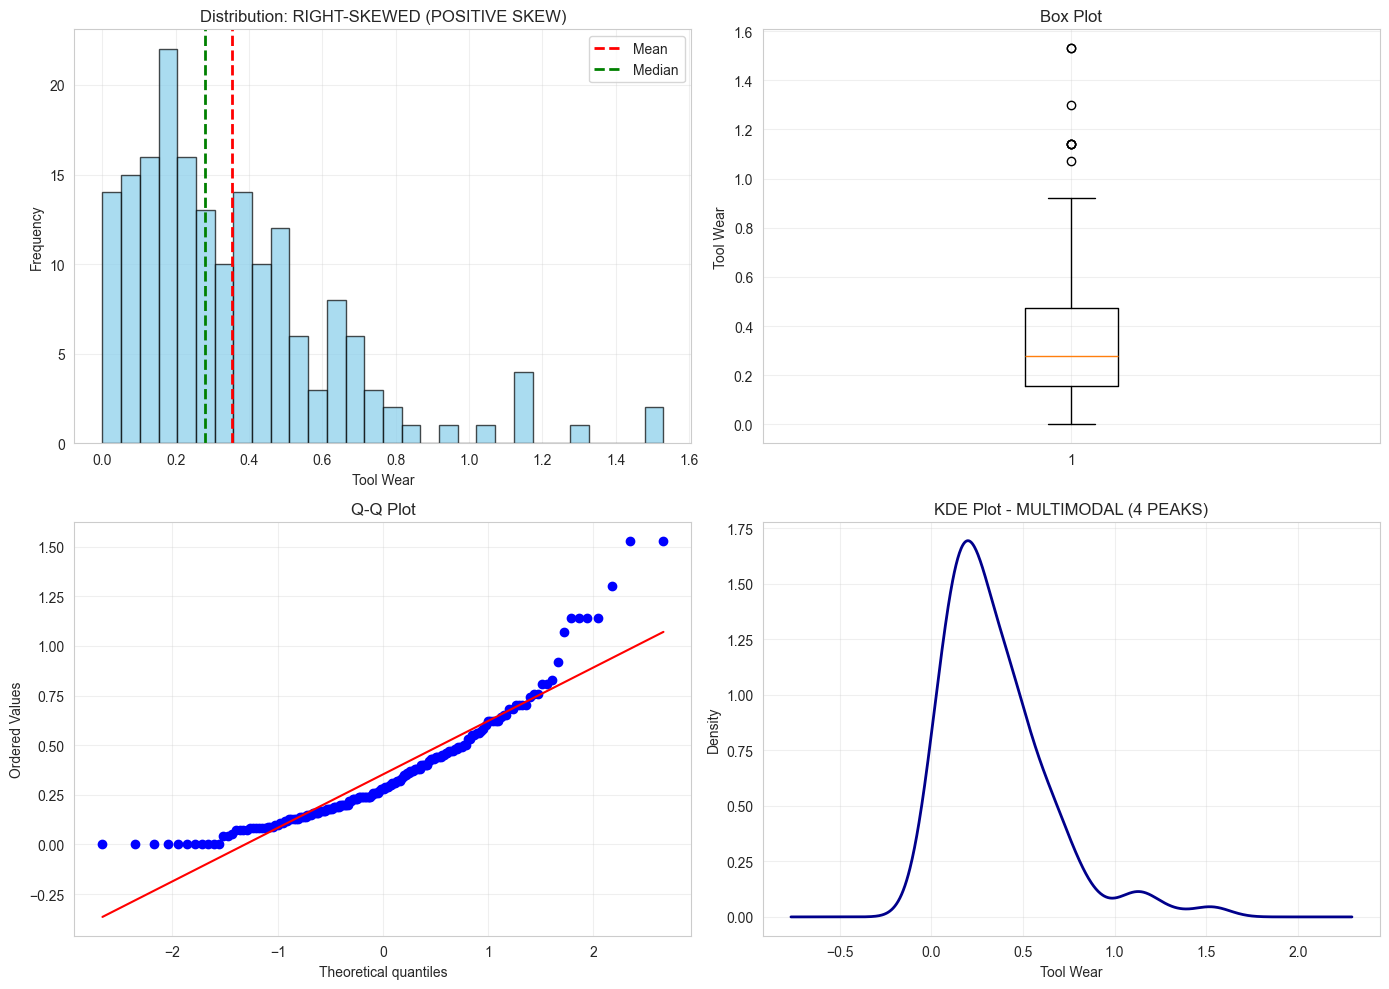

In [19]:
# Calculate skewness and kurtosis
from scipy.stats import skew, kurtosis

shape_stats = pd.DataFrame({
    'Skewness': df[analysis_cols].skew(),
    'Kurtosis': df[analysis_cols].kurtosis()
})

print("Shape Statistics:")
display(shape_stats.round(4))

# Interpret tool wear distribution
vb_skew = df['VB'].skew()
vb_kurt = df['VB'].kurtosis()

print("\n" + "="*50)
print("TOOL WEAR DISTRIBUTION ANALYSIS:")
print("="*50)
print(f"Skewness: {vb_skew:.4f}")
print(f"Kurtosis: {vb_kurt:.4f}")

# Skewness interpretation
if abs(vb_skew) < 0.5:
    skew_type = "approximately symmetric"
elif vb_skew > 0:
    skew_type = "right-skewed (positive skew)"
else:
    skew_type = "left-skewed (negative skew)"

# Kurtosis interpretation
if abs(vb_kurt) < 1:
    kurt_type = "mesokurtic (normal-like tails)"
elif vb_kurt > 0:
    kurt_type = "leptokurtic (heavy tails)"
else:
    kurt_type = "platykurtic (light tails)"

print(f"\nShape: The distribution is {skew_type}")
print(f"Tails: The distribution is {kurt_type}")

# Check for multimodality (simple check using modes)
hist, bin_edges = np.histogram(df['VB'].dropna(), bins=30)
from scipy.signal import find_peaks
peaks, _ = find_peaks(hist, height=max(hist)*0.3)
n_modes = len(peaks)

if n_modes <= 1:
    mode_type = "unimodal (single peak)"
elif n_modes == 2:
    mode_type = "bimodal (two peaks)"
else:
    mode_type = f"multimodal ({n_modes} peaks)"

print(f"Modality: The distribution is {mode_type}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram with statistics
axes[0, 0].hist(df['VB'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['VB'].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
axes[0, 0].axvline(df['VB'].median(), color='green', linestyle='--', linewidth=2, label='Median')
axes[0, 0].set_xlabel('Tool Wear')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title(f'Distribution: {skew_type.upper()}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot
axes[0, 1].boxplot(df['VB'].dropna(), vert=True)
axes[0, 1].set_ylabel('Tool Wear')
axes[0, 1].set_title('Box Plot')
axes[0, 1].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(df['VB'].dropna(), dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot')
axes[1, 0].grid(True, alpha=0.3)

# KDE with rug plot
df['VB'].plot(kind='kde', ax=axes[1, 1], color='darkblue', linewidth=2)
axes[1, 1].set_xlabel('Tool Wear')
axes[1, 1].set_ylabel('Density')
axes[1, 1].set_title(f'KDE Plot - {mode_type.upper()}')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Outlier Detection

Outlier Detection Results:



,Column,IQR Method,Z-Score Method,IQR %
0,VB,8,3,4.44%
1,time,3,2,1.67%
2,DOC,0,0,0.00%
3,feed,0,0,0.00%
4,material,0,0,0.00%
5,smcAC,0,0,0.00%
6,smcDC,8,6,4.44%
7,vib_table,17,5,9.44%
8,vib_spindle,6,4,3.33%
9,AE_table,10,9,5.56%


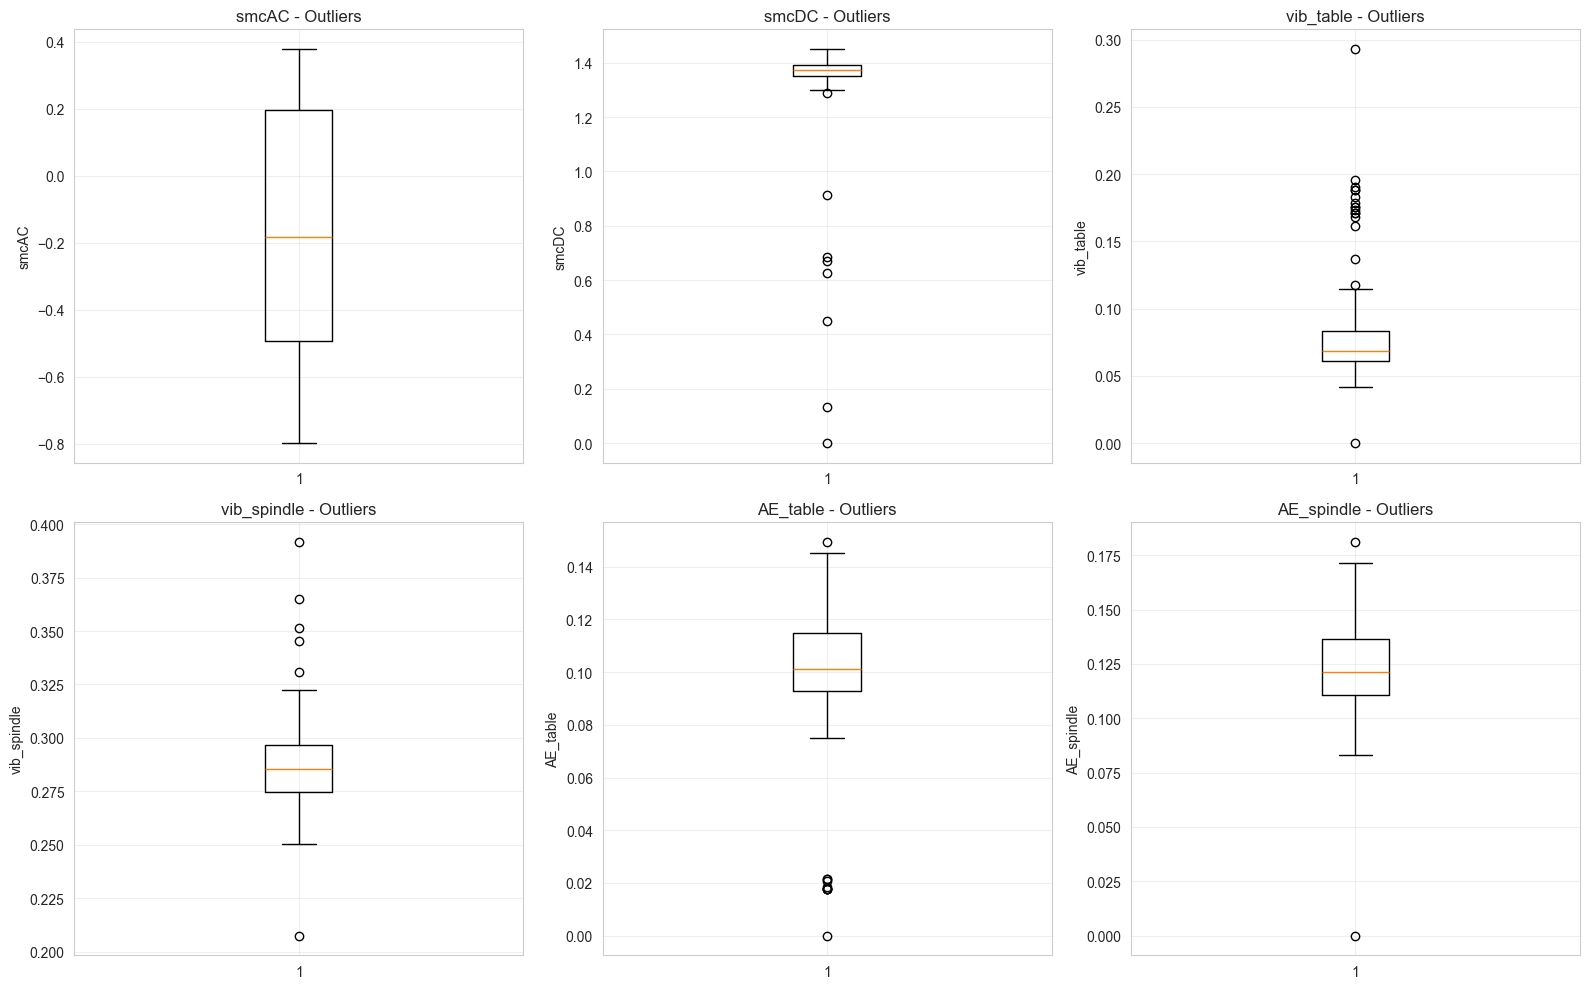

In [20]:
# Detect outliers using multiple methods
from scipy import stats

def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data.dropna()))
    return data[z_scores > threshold]

# Apply outlier detection
print("Outlier Detection Results:\n")
print("="*70)

outlier_summary = []

for col in analysis_cols:
    iqr_outliers = detect_outliers_iqr(df[col])
    z_outliers = detect_outliers_zscore(df[col])
    
    outlier_summary.append({
        'Column': col,
        'IQR Method': len(iqr_outliers),
        'Z-Score Method': len(z_outliers),
        'IQR %': f"{len(iqr_outliers)/len(df)*100:.2f}%"
    })
    
outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

# Visualize outliers
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(sensor_cols):
    axes[idx].boxplot(df[col].dropna(), vert=True)
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f'{col} - Outliers')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Outlier Analysis

**Answer the following questions:**

- **Which method did you use (IQR or Modified Z-score)?**
- **Why?**
- **Which parameters contain significant outliers?**
- **How removal affected dataset statistics?**

In [21]:
# Remove outliers using IQR method (chosen method)
print("OUTLIER REMOVAL ANALYSIS")
print("="*70)
print("\nMethod Selected: IQR (Interquartile Range) Method")
print("\nReason:")
print("1. IQR is more robust to extreme values in the dataset")
print("2. It doesn't assume normal distribution (our data may not be normal)")
print("3. Standard practice in sensor data analysis")
print("4. Z-score method assumes normality which may not hold for all sensors")

# Store original statistics
stats_before = df[analysis_cols].describe()

# Remove outliers
df_cleaned = df.copy()
outliers_removed = {}

for col in sensor_cols:  # Only remove outliers from sensor columns
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers before removal
    outliers_count = len(df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)])
    outliers_removed[col] = outliers_count
    
    # Remove outliers
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Statistics after removal
stats_after = df_cleaned[analysis_cols].describe()

print("\n" + "="*70)
print("PARAMETERS WITH SIGNIFICANT OUTLIERS:")
print("="*70)
for col, count in sorted(outliers_removed.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / len(df)) * 100
    if percentage > 1:  # Significant if > 1%
        print(f"{col}: {count} outliers ({percentage:.2f}%)")

print(f"\n{'='*70}")
print(f"Dataset size before: {len(df)}")
print(f"Dataset size after: {len(df_cleaned)}")
print(f"Total rows removed: {len(df) - len(df_cleaned)}")
print(f"Percentage removed: {(len(df) - len(df_cleaned))/len(df)*100:.2f}%")

# Compare statistics
print("\n" + "="*70)
print("IMPACT ON STATISTICS:")
print("="*70)

comparison = pd.DataFrame({
    'Mean Before': stats_before.loc['mean'],
    'Mean After': stats_after.loc['mean'],
    'Std Before': stats_before.loc['std'],
    'Std After': stats_after.loc['std'],
    'Std Change %': ((stats_after.loc['std'] - stats_before.loc['std']) / stats_before.loc['std'] * 100)
})

display(comparison.round(4))

print("\nKEY OBSERVATIONS:")
print("-" * 70)
for col in sensor_cols:
    std_change = comparison.loc[col, 'Std Change %']
    if abs(std_change) > 10:
        print(f"✓ {col}: Significant reduction in variability ({std_change:.1f}% change)")
        
# Update the main dataframe
df = df_cleaned.copy()

OUTLIER REMOVAL ANALYSIS

Method Selected: IQR (Interquartile Range) Method

Reason:
1. IQR is more robust to extreme values in the dataset
2. It doesn't assume normal distribution (our data may not be normal)
3. Standard practice in sensor data analysis
4. Z-score method assumes normality which may not hold for all sensors

PARAMETERS WITH SIGNIFICANT OUTLIERS:
vib_table: 17 outliers (9.44%)
AE_table: 10 outliers (5.56%)
smcDC: 8 outliers (4.44%)
vib_spindle: 5 outliers (2.78%)

Dataset size before: 180
Dataset size after: 140
Total rows removed: 40
Percentage removed: 22.22%

IMPACT ON STATISTICS:


,Mean Before,Mean After,Std Before,Std After,Std Change %
VB,0.3526,0.3843,0.2854,0.2981,4.4475
time,25.5833,26.4357,22.8307,22.4183,-1.8063
DOC,1.0375,1.0286,0.3657,0.3637,-0.5400
feed,0.3722,0.3750,0.1253,0.1254,0.1046
material,1.3556,1.4000,0.4800,0.4917,2.4250
smcAC,-0.1658,-0.1917,0.3465,0.3432,-0.9256
smcDC,1.3395,1.3746,0.1828,0.0292,-84.0411
vib_table,0.0792,0.0683,0.0361,0.0132,-63.3679
vib_spindle,0.2874,0.2854,0.0206,0.0160,-22.4952
AE_table,0.1004,0.1032,0.0240,0.0134,-44.2265



KEY OBSERVATIONS:
----------------------------------------------------------------------
✓ smcDC: Significant reduction in variability (-84.0% change)
✓ vib_table: Significant reduction in variability (-63.4% change)
✓ vib_spindle: Significant reduction in variability (-22.5% change)
✓ AE_table: Significant reduction in variability (-44.2% change)
✓ AE_spindle: Significant reduction in variability (-20.4% change)


## Task 4: Correlation Analysis

In [22]:
# Compute correlation matrix (for all numerical features)
correlation_matrix = df[analysis_cols].corr()

print("Correlation Matrix:")
display(correlation_matrix.round(3))

# Correlation with target variable (VB)
print("\nCorrelation with Tool Wear (VB):")
vb_correlation = correlation_matrix['VB'].sort_values(ascending=False)
print(vb_correlation)

Correlation Matrix:


,VB,time,DOC,feed,material,smcAC,smcDC,vib_table,vib_spindle,AE_table,AE_spindle
VB,1.000,0.290,0.032,-0.013,0.346,-0.039,0.023,-0.033,-0.202,-0.215,-0.201
time,0.290,1.000,-0.233,-0.094,-0.515,-0.015,0.211,0.318,-0.272,0.037,0.079
DOC,0.032,-0.233,1.000,0.148,0.006,0.009,0.059,-0.267,0.176,-0.006,-0.063
feed,-0.013,-0.094,0.148,1.000,-0.000,0.168,0.020,-0.032,0.026,-0.038,-0.064
material,0.346,-0.515,0.006,-0.000,1.000,0.049,-0.201,-0.228,-0.035,-0.251,-0.279
smcAC,-0.039,-0.015,0.009,0.168,0.049,1.000,0.274,-0.006,-0.106,-0.090,-0.086
smcDC,0.023,0.211,0.059,0.020,-0.201,0.274,1.000,0.150,-0.085,-0.171,-0.148
vib_table,-0.033,0.318,-0.267,-0.032,-0.228,-0.006,0.150,1.000,-0.016,0.083,0.065
vib_spindle,-0.202,-0.272,0.176,0.026,-0.035,-0.106,-0.085,-0.016,1.000,-0.030,-0.067
AE_table,-0.215,0.037,-0.006,-0.038,-0.251,-0.090,-0.171,0.083,-0.030,1.000,0.950



Correlation with Tool Wear (VB):
VB             1.000000
material       0.345549
time           0.289522
DOC            0.031708
smcDC          0.023049
feed          -0.012985
vib_table     -0.032725
smcAC         -0.038833
AE_spindle    -0.201059
vib_spindle   -0.201502
AE_table      -0.214744
Name: VB, dtype: float64


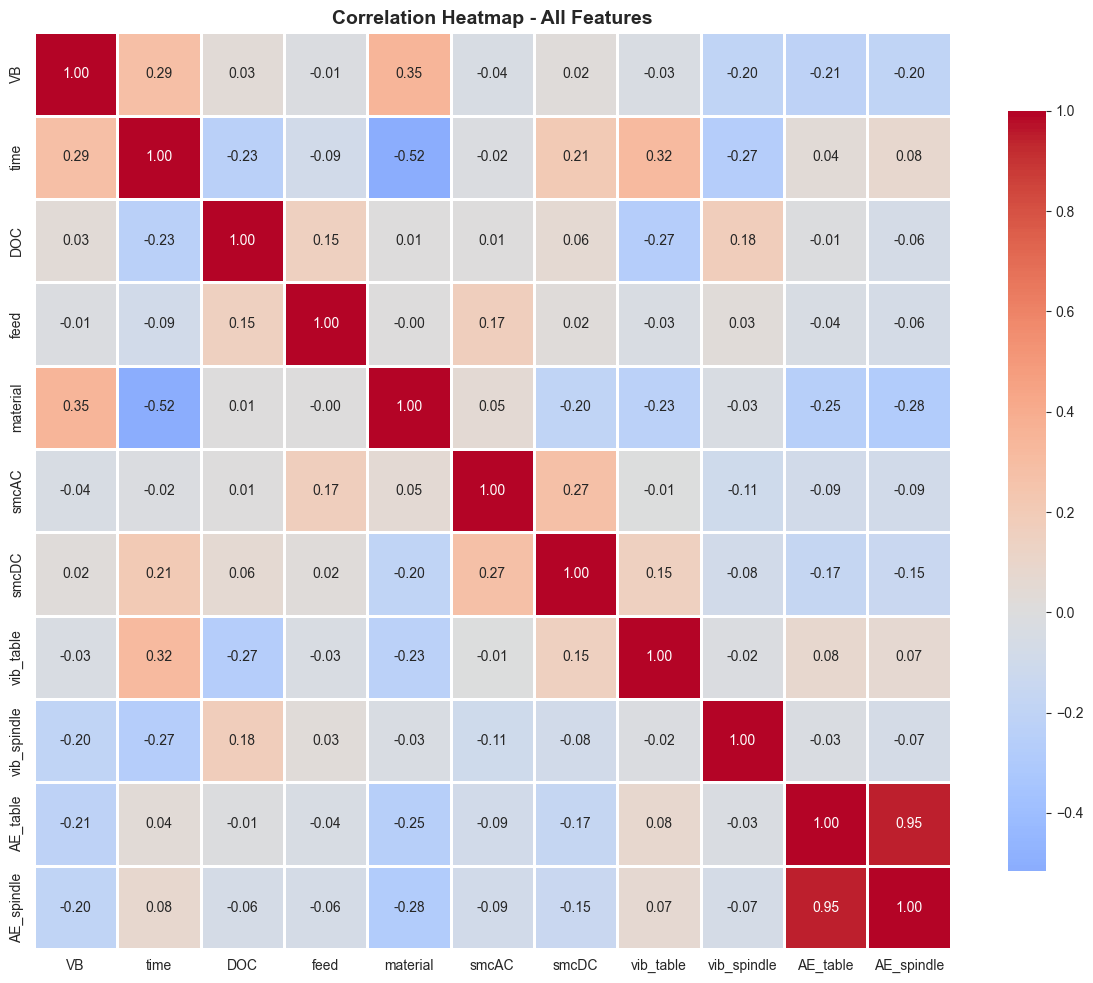

In [23]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - All Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Correlation Analysis Questions

**Answer the following:**

- **Does tool wear strongly correlate with vibration?**
- **Which sensor appears most predictive of tool wear?**
- **Are any features redundant?**

CORRELATION ANALYSIS RESULTS

1. Tool Wear vs Vibration:
   - Vibration Table correlation: -0.0327
   - Vibration Spindle correlation: -0.2015
   - Average vibration correlation: 0.1171
   ○ Weak correlation - vibration and tool wear are not strongly related

2. Most Predictive Sensor: AE_table
   - Correlation with tool wear: -0.2147
   - Absolute correlation: 0.2147

   All sensor correlations (sorted by strength):
   - AE_table: -0.2147 (|0.2147|)
   - vib_spindle: -0.2015 (|0.2015|)
   - AE_spindle: -0.2011 (|0.2011|)
   - smcAC: -0.0388 (|0.0388|)
   - vib_table: -0.0327 (|0.0327|)
   - smcDC: 0.0230 (|0.0230|)

3. Redundant Features Analysis:
   (Features with correlation > 0.8 might be redundant)
   ✓ AE_table <-> AE_spindle: 0.9498

   Found 1 redundant feature pair(s)
   Consider removing one feature from each pair for dimensionality reduction


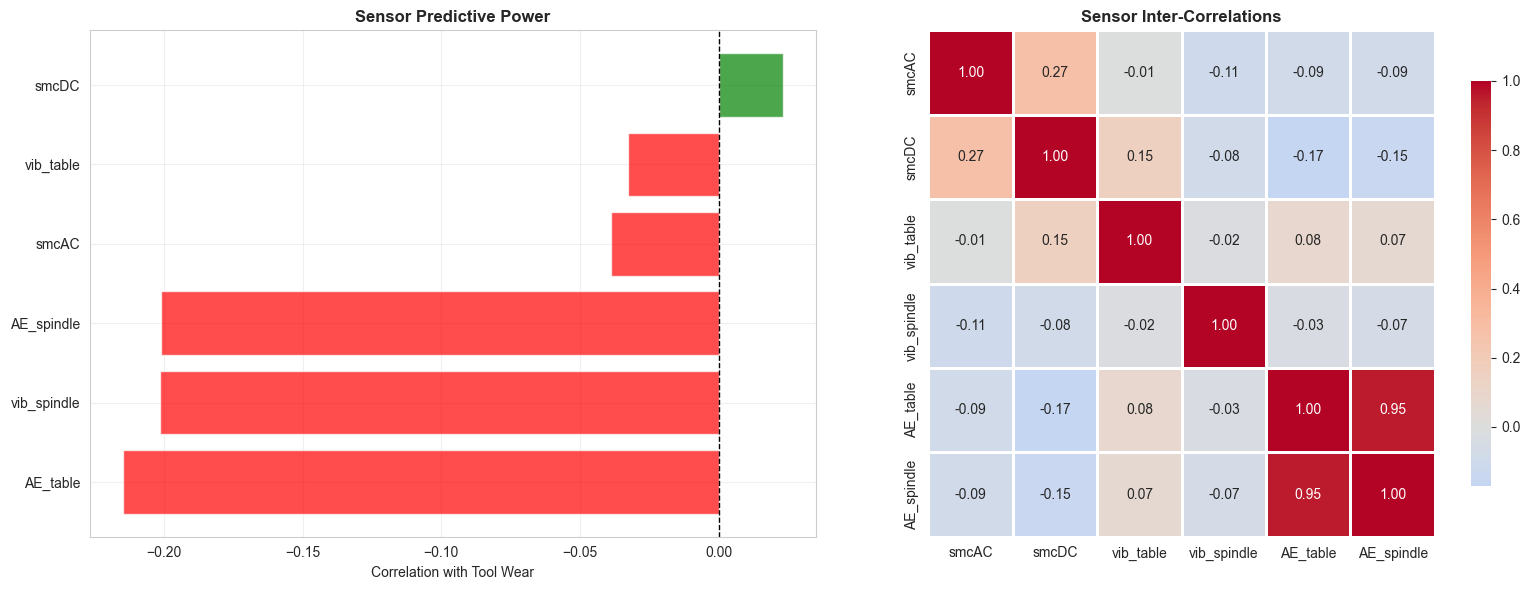

In [24]:
print("CORRELATION ANALYSIS RESULTS")
print("="*70)

# 1. Tool wear vs vibration correlation
vib_table_corr = correlation_matrix.loc['VB', 'vib_table']
vib_spindle_corr = correlation_matrix.loc['VB', 'vib_spindle']
avg_vib_corr = (abs(vib_table_corr) + abs(vib_spindle_corr)) / 2

print("\n1. Tool Wear vs Vibration:")
print(f"   - Vibration Table correlation: {vib_table_corr:.4f}")
print(f"   - Vibration Spindle correlation: {vib_spindle_corr:.4f}")
print(f"   - Average vibration correlation: {avg_vib_corr:.4f}")

if avg_vib_corr > 0.7:
    print("   ✓ Strong positive correlation - vibration increases with tool wear")
elif avg_vib_corr > 0.4:
    print("   ✓ Moderate correlation - vibration is somewhat related to tool wear")
elif avg_vib_corr < -0.4:
    print("   ✗ Moderate negative correlation - vibration decreases with tool wear")
else:
    print("   ○ Weak correlation - vibration and tool wear are not strongly related")

# 2. Most predictive sensor
sensor_correlations = correlation_matrix.loc['VB', sensor_cols].abs().sort_values(ascending=False)
most_predictive = sensor_correlations.index[0]
highest_corr = sensor_correlations.iloc[0]

print(f"\n2. Most Predictive Sensor: {most_predictive}")
print(f"   - Correlation with tool wear: {correlation_matrix.loc['VB', most_predictive]:.4f}")
print(f"   - Absolute correlation: {highest_corr:.4f}")
print("\n   All sensor correlations (sorted by strength):")
for sensor, corr in sensor_correlations.items():
    print(f"   - {sensor}: {correlation_matrix.loc['VB', sensor]:.4f} (|{corr:.4f}|)")

# 3. Redundant features (high inter-correlation)
print("\n3. Redundant Features Analysis:")
print("   (Features with correlation > 0.8 might be redundant)")

redundant_pairs = []
for i in range(len(sensor_cols)):
    for j in range(i+1, len(sensor_cols)):
        col1, col2 = sensor_cols[i], sensor_cols[j]
        corr = correlation_matrix.loc[col1, col2]
        if abs(corr) > 0.8:
            redundant_pairs.append((col1, col2, corr))
            print(f"   ✓ {col1} <-> {col2}: {corr:.4f}")

if not redundant_pairs:
    print("   ○ No highly redundant features found (correlation > 0.8)")
else:
    print(f"\n   Found {len(redundant_pairs)} redundant feature pair(s)")
    print("   Consider removing one feature from each pair for dimensionality reduction")

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of correlations with tool wear
sensor_correlations_signed = correlation_matrix.loc['VB', sensor_cols].sort_values()
colors = ['red' if x < 0 else 'green' for x in sensor_correlations_signed]
axes[0].barh(range(len(sensor_correlations_signed)), sensor_correlations_signed, color=colors, alpha=0.7)
axes[0].set_yticks(range(len(sensor_correlations_signed)))
axes[0].set_yticklabels(sensor_correlations_signed.index)
axes[0].set_xlabel('Correlation with Tool Wear')
axes[0].set_title('Sensor Predictive Power', fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='--', linewidth=1)
axes[0].grid(True, alpha=0.3)

# Heatmap of sensor inter-correlations
sensor_corr_matrix = correlation_matrix.loc[sensor_cols, sensor_cols]
sns.heatmap(sensor_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=axes[1], 
            cbar_kws={"shrink": 0.8})
axes[1].set_title('Sensor Inter-Correlations', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)

## Task 5: Data Visualization

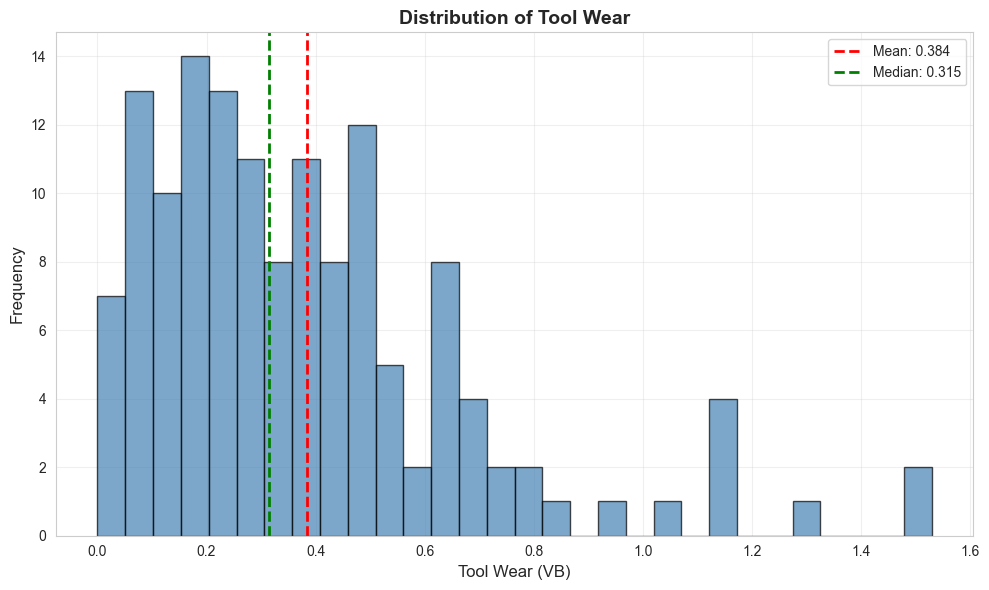

In [25]:
# Create: Histogram (Tool Wear)
plt.figure(figsize=(10, 6))
plt.hist(df['VB'].dropna(), bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Tool Wear (VB)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Tool Wear', fontsize=14, fontweight='bold')
plt.axvline(df['VB'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["VB"].mean():.3f}')
plt.axvline(df['VB'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["VB"].median():.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

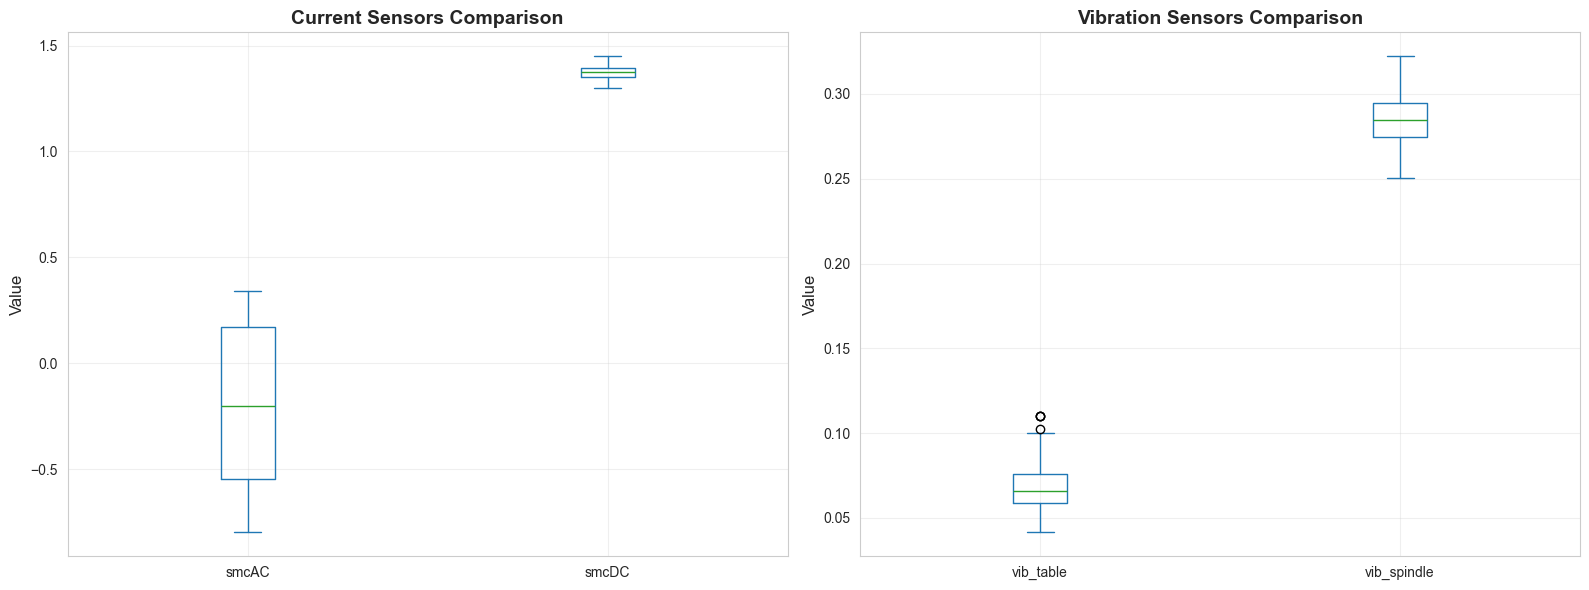

In [26]:
# Boxplot (Sensor Comparison)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Current sensors
df[['smcAC', 'smcDC']].plot(kind='box', ax=axes[0])
axes[0].set_title('Current Sensors Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Value', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Vibration sensors
df[['vib_table', 'vib_spindle']].plot(kind='box', ax=axes[1])
axes[1].set_title('Vibration Sensors Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Value', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

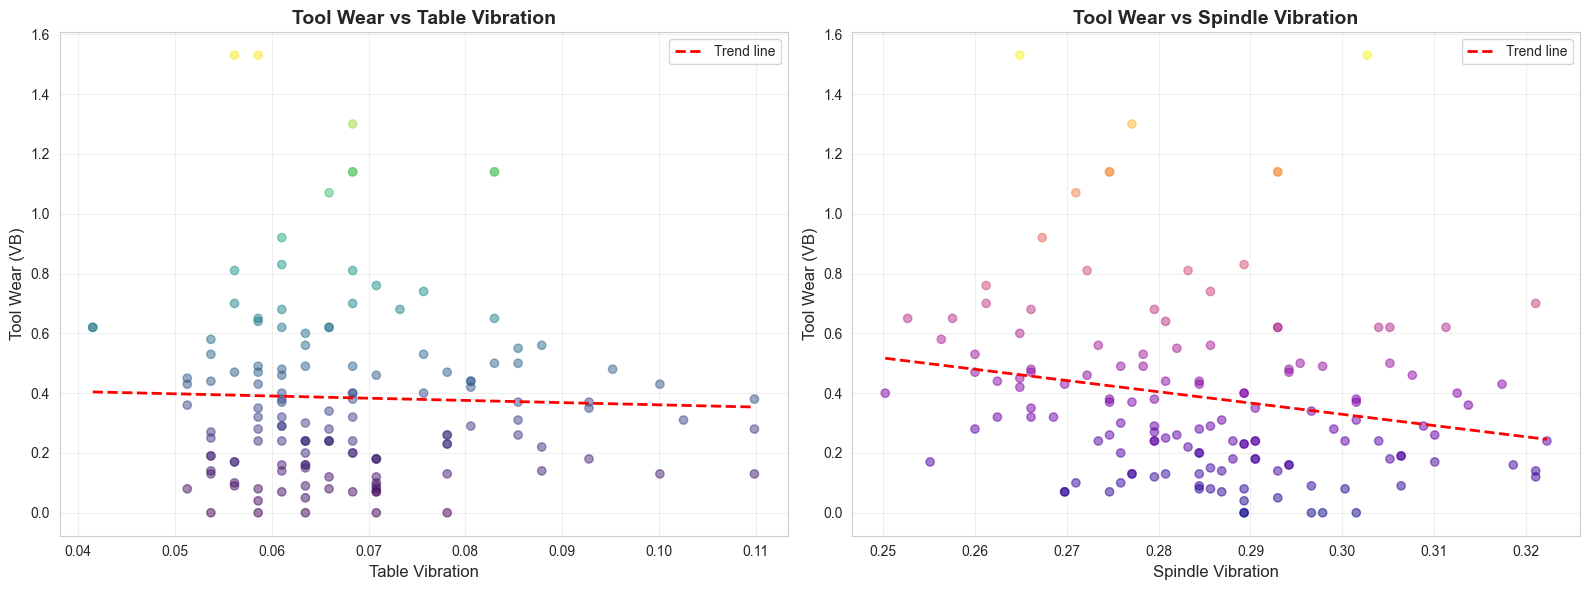

In [27]:
# Scatter Plot (Tool Wear vs Vibration)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Tool wear vs table vibration
axes[0].scatter(df['vib_table'], df['VB'], alpha=0.5, c=df['VB'], cmap='viridis')
axes[0].set_xlabel('Table Vibration', fontsize=12)
axes[0].set_ylabel('Tool Wear (VB)', fontsize=12)
axes[0].set_title('Tool Wear vs Table Vibration', fontsize=14, fontweight='bold')
z = np.polyfit(df['vib_table'].dropna(), df['VB'].dropna(), 1)
p = np.poly1d(z)
axes[0].plot(df['vib_table'].sort_values(), p(df['vib_table'].sort_values()), 
             "r--", linewidth=2, label=f'Trend line')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Tool wear vs spindle vibration
axes[1].scatter(df['vib_spindle'], df['VB'], alpha=0.5, c=df['VB'], cmap='plasma')
axes[1].set_xlabel('Spindle Vibration', fontsize=12)
axes[1].set_ylabel('Tool Wear (VB)', fontsize=12)
axes[1].set_title('Tool Wear vs Spindle Vibration', fontsize=14, fontweight='bold')
z = np.polyfit(df['vib_spindle'].dropna(), df['VB'].dropna(), 1)
p = np.poly1d(z)
axes[1].plot(df['vib_spindle'].sort_values(), p(df['vib_spindle'].sort_values()), 
             "r--", linewidth=2, label=f'Trend line')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

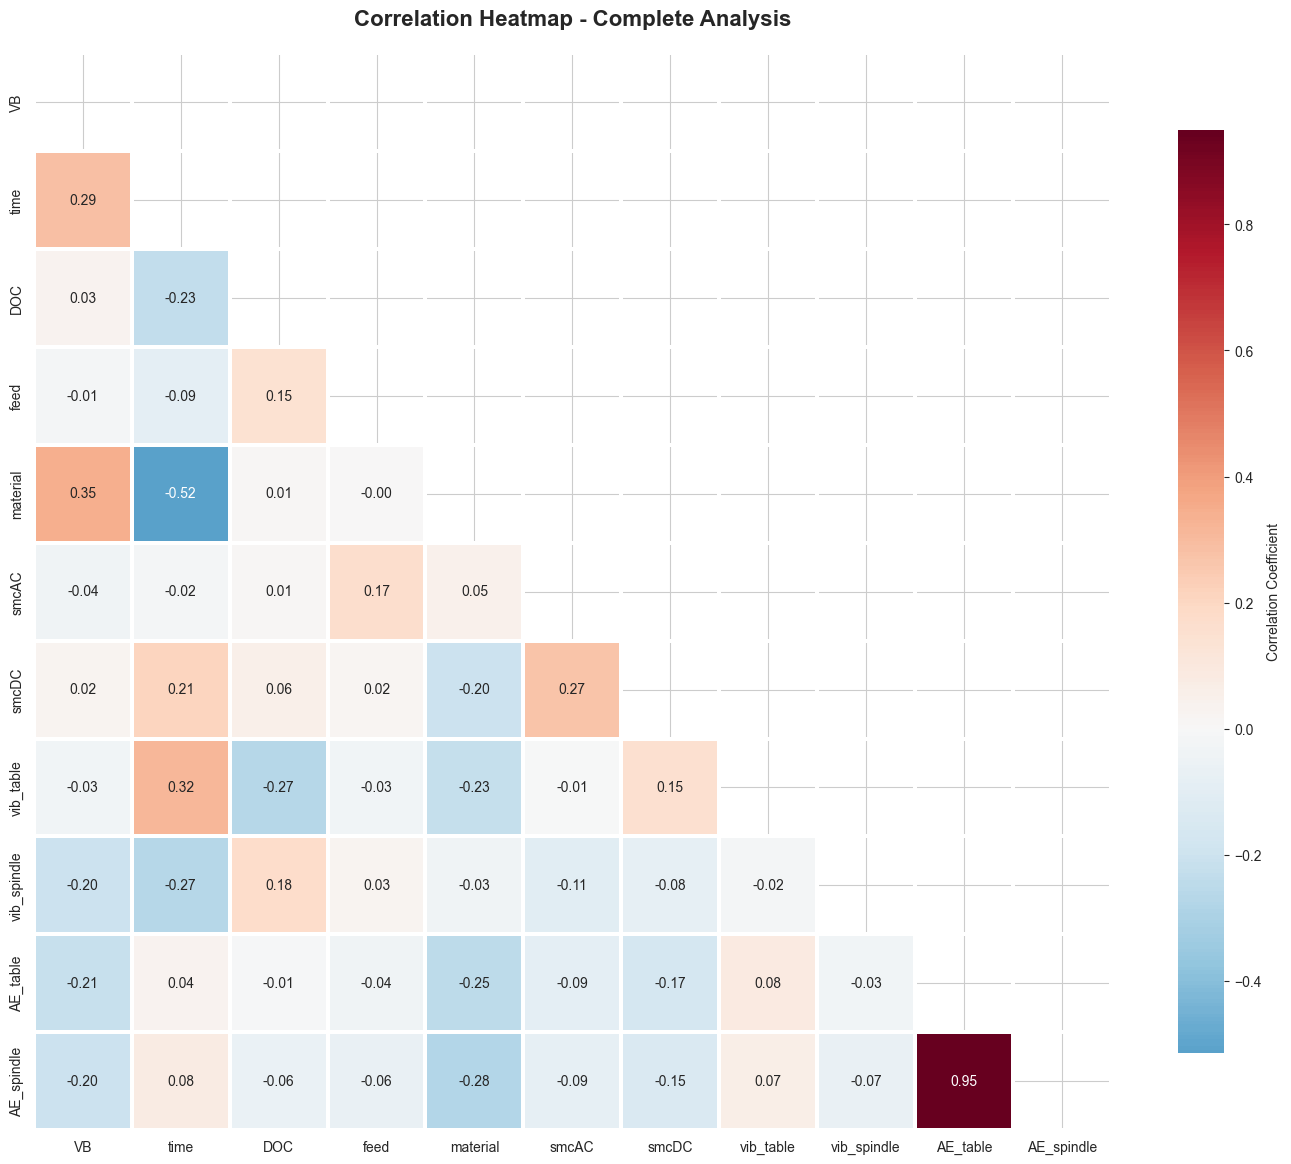

In [28]:
# Correlation Heatmap (already created in Task 4, but creating enhanced version)
plt.figure(figsize=(14, 12))

# Mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdBu_r', center=0, square=True, linewidths=1.5,
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})
plt.title('Correlation Heatmap - Complete Analysis', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

## 5. Engineering Thinking Questions

### Question 1: Which parameter affects tool wear the most?

ENGINEERING ANALYSIS - QUESTION 1
Which parameter affects tool wear the most?

Top 5 parameters affecting tool wear (by correlation):
1. run: 0.3681
2. material: 0.3455
3. time: 0.2895
4. case: 0.2157
5. AE_table: 0.2147

ANSWER: run has the strongest correlation (0.3681)


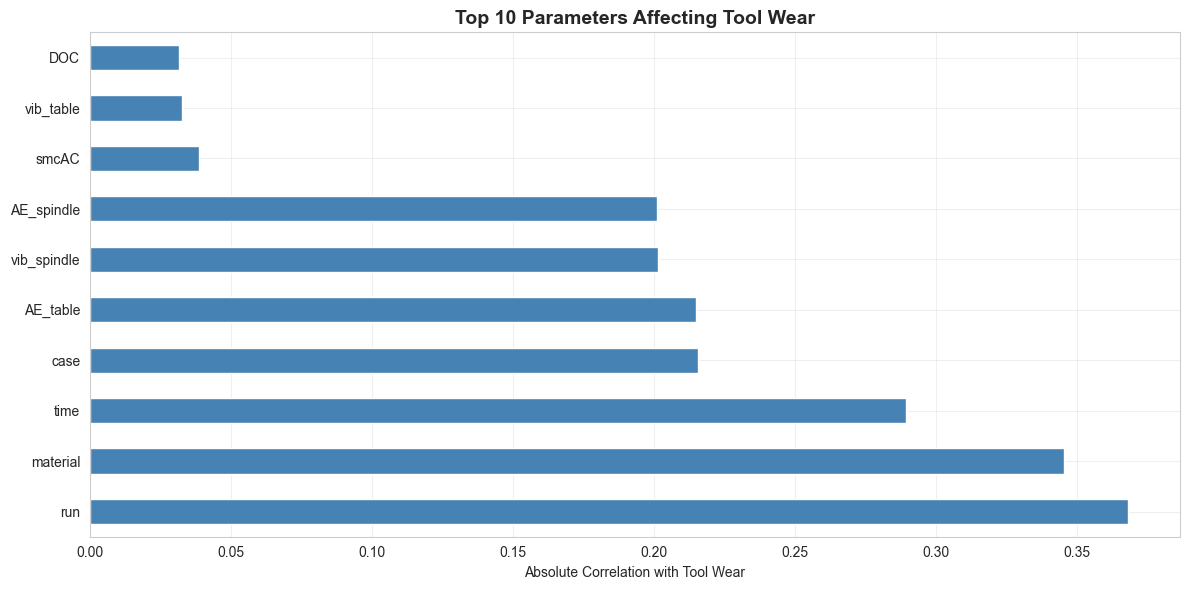

In [29]:
print("ENGINEERING ANALYSIS - QUESTION 1")
print("="*70)
print("Which parameter affects tool wear the most?\n")

# Get correlations with tool wear
all_features = [col for col in df.columns if col not in ['S.no', 'Unnamed: 1', 'VB']]
vb_correlations = df[all_features + ['VB']].corr()['VB'].drop('VB').abs().sort_values(ascending=False)

print("Top 5 parameters affecting tool wear (by correlation):")
for i, (param, corr) in enumerate(vb_correlations.head().items(), 1):
    print(f"{i}. {param}: {corr:.4f}")

most_influential = vb_correlations.index[0]
highest_corr_value = vb_correlations.iloc[0]

print(f"\n{'='*70}")
print(f"ANSWER: {most_influential} has the strongest correlation ({highest_corr_value:.4f})")
print(f"{'='*70}")

# Visualization
plt.figure(figsize=(12, 6))
vb_correlations.head(10).plot(kind='barh', color='steelblue')
plt.xlabel('Absolute Correlation with Tool Wear')
plt.title('Top 10 Parameters Affecting Tool Wear', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Question 2: Which sensor signal is most stable?

ENGINEERING ANALYSIS - QUESTION 2
Which sensor signal is most stable?

Sensor Stability Rankings (lower CV = more stable):


,Coefficient of Variation,Standard Deviation,Range
smcAC,-179.1000,0.3432,1.1401
smcDC,2.1225,0.0292,0.1514
vib_spindle,5.5900,0.0160,0.0720
AE_table,12.9710,0.0134,0.0604
AE_spindle,13.5786,0.0166,0.0812
vib_table,19.3448,0.0132,0.0684



ANSWER: smcAC is the most stable sensor
Coefficient of Variation: -179.10%


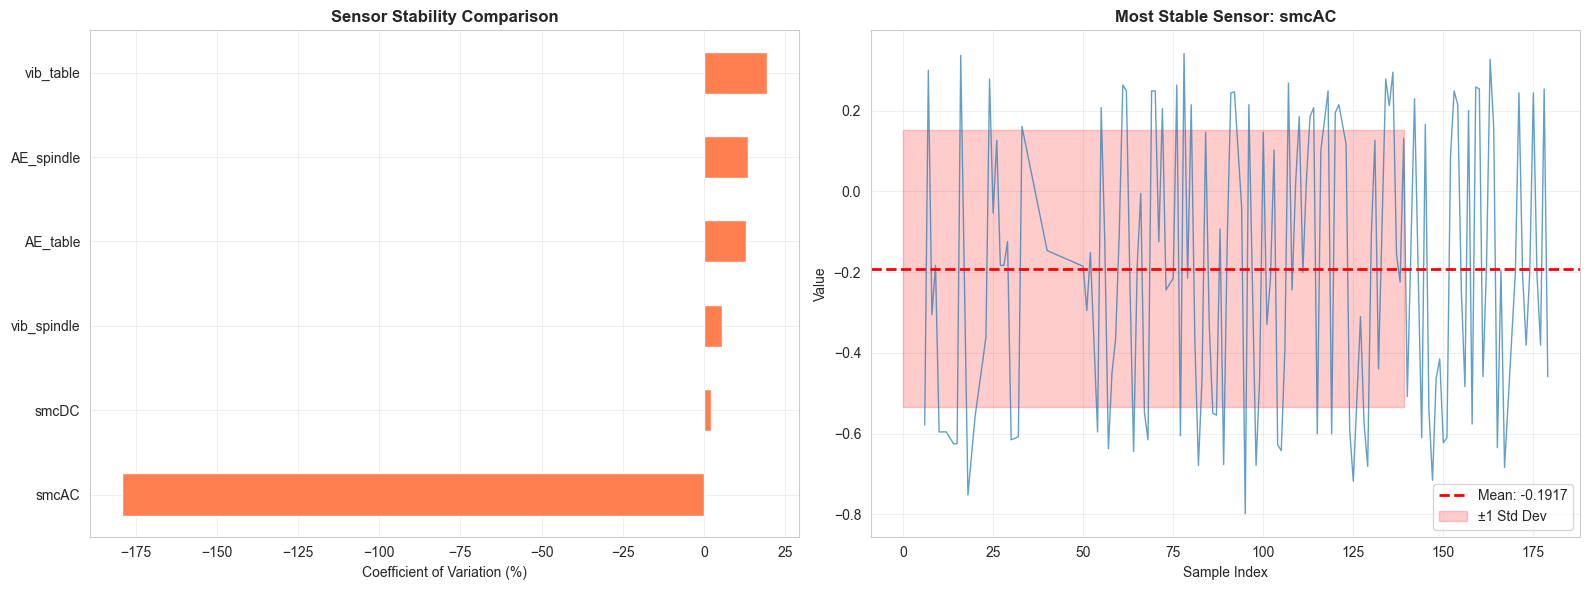

In [30]:
print("ENGINEERING ANALYSIS - QUESTION 2")
print("="*70)
print("Which sensor signal is most stable?\n")

# Calculate stability metrics (lower CV = more stable)
sensor_stability = pd.DataFrame({
    'Coefficient of Variation': (df[sensor_cols].std() / df[sensor_cols].mean() * 100),
    'Standard Deviation': df[sensor_cols].std(),
    'Range': df[sensor_cols].max() - df[sensor_cols].min()
})

sensor_stability = sensor_stability.sort_values('Coefficient of Variation')

print("Sensor Stability Rankings (lower CV = more stable):")
display(sensor_stability.round(4))

most_stable = sensor_stability.index[0]
stability_cv = sensor_stability.loc[most_stable, 'Coefficient of Variation']

print(f"\n{'='*70}")
print(f"ANSWER: {most_stable} is the most stable sensor")
print(f"Coefficient of Variation: {stability_cv:.2f}%")
print(f"{'='*70}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Stability comparison
sensor_stability['Coefficient of Variation'].plot(kind='barh', ax=axes[0], color='coral')
axes[0].set_xlabel('Coefficient of Variation (%)')
axes[0].set_title('Sensor Stability Comparison', fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Time series of most stable sensor
axes[1].plot(df[most_stable], linewidth=1, alpha=0.7)
axes[1].axhline(df[most_stable].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {df[most_stable].mean():.4f}')
axes[1].fill_between(range(len(df)), 
                      df[most_stable].mean() - df[most_stable].std(),
                      df[most_stable].mean() + df[most_stable].std(),
                      alpha=0.2, color='red', label='±1 Std Dev')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Value')
axes[1].set_title(f'Most Stable Sensor: {most_stable}', fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Question 3: Are there abnormal machining cycles?

ENGINEERING ANALYSIS - QUESTION 3
Are there abnormal machining cycles?

Total cycles analyzed: 140
Abnormal cycles detected: 0
Percentage abnormal: 0.00%

ANSWER: NO significant abnormal cycles detected


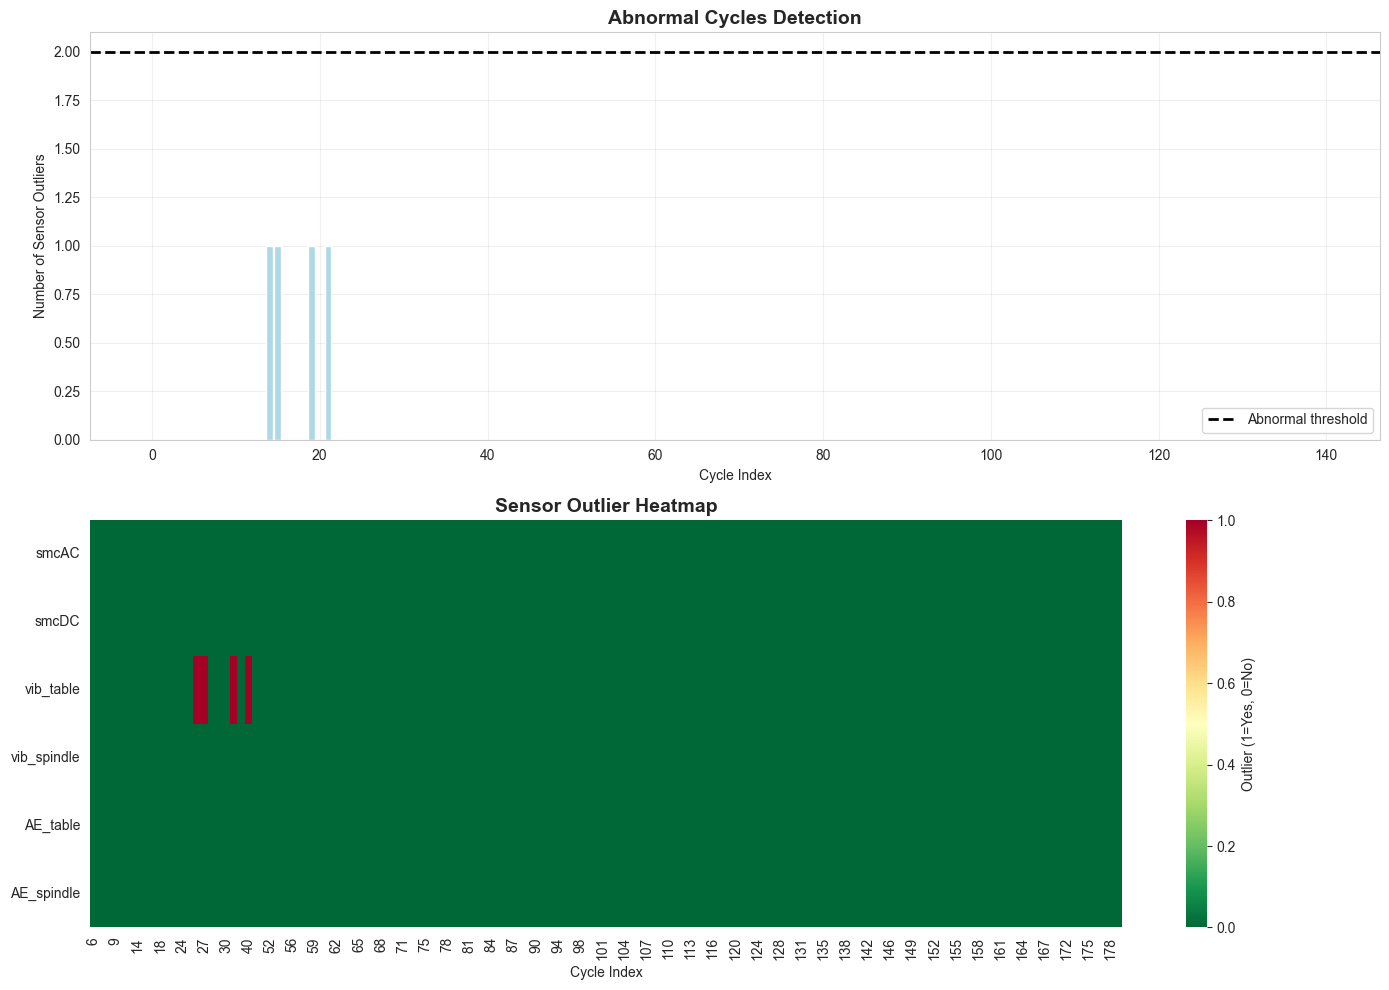

In [31]:
print("ENGINEERING ANALYSIS - QUESTION 3")
print("="*70)
print("Are there abnormal machining cycles?\n")

# Define abnormal as: any cycle where multiple sensors show outliers simultaneously
outlier_counts = pd.DataFrame(index=df.index)

for col in sensor_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).astype(int)

outlier_counts['Total_Outliers'] = outlier_counts.sum(axis=1)

# Cycles with 2 or more sensor outliers are considered abnormal
abnormal_cycles = df[outlier_counts['Total_Outliers'] >= 2].copy()
abnormal_cycles['Outlier_Count'] = outlier_counts.loc[abnormal_cycles.index, 'Total_Outliers']

print(f"Total cycles analyzed: {len(df)}")
print(f"Abnormal cycles detected: {len(abnormal_cycles)}")
print(f"Percentage abnormal: {len(abnormal_cycles)/len(df)*100:.2f}%")

if len(abnormal_cycles) > 0:
    print(f"\n{'='*70}")
    print(f"ANSWER: YES, {len(abnormal_cycles)} abnormal machining cycles detected")
    print(f"{'='*70}")
    print("\nTop 10 most abnormal cycles:")
    display(abnormal_cycles.nlargest(10, 'Outlier_Count')[['case', 'run', 'VB', 'Outlier_Count'] + sensor_cols])
else:
    print(f"\n{'='*70}")
    print(f"ANSWER: NO significant abnormal cycles detected")
    print(f"{'='*70}")

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Outlier count distribution
axes[0].bar(range(len(outlier_counts)), outlier_counts['Total_Outliers'], 
            color=['red' if x >= 2 else 'lightblue' for x in outlier_counts['Total_Outliers']])
axes[0].axhline(y=2, color='black', linestyle='--', linewidth=2, label='Abnormal threshold')
axes[0].set_xlabel('Cycle Index')
axes[0].set_ylabel('Number of Sensor Outliers')
axes[0].set_title('Abnormal Cycles Detection', fontweight='bold', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Heatmap of outliers
sns.heatmap(outlier_counts[sensor_cols].T, cmap='RdYlGn_r', cbar_kws={'label': 'Outlier (1=Yes, 0=No)'}, 
            ax=axes[1], yticklabels=sensor_cols)
axes[1].set_xlabel('Cycle Index')
axes[1].set_title('Sensor Outlier Heatmap', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

### Question 4: Can tool wear be predicted from sensor data?

ENGINEERING ANALYSIS - QUESTION 4
Can tool wear be predicted from sensor data?

Model Performance:


,Model,R² Score,MAE,RMSE
0,Linear Regression,0.0423,0.2428,0.3332
1,Random Forest,0.1173,0.2412,0.3199



ANSWER: PARTIALLY, prediction is possible but with LIMITED accuracy
Best Model: Random Forest (R² = 0.1173)

Feature Importance for Prediction:


,Feature,Importance
1,smcDC,0.201942
4,AE_table,0.186119
3,vib_spindle,0.178869
5,AE_spindle,0.173546
0,smcAC,0.171903
2,vib_table,0.087621


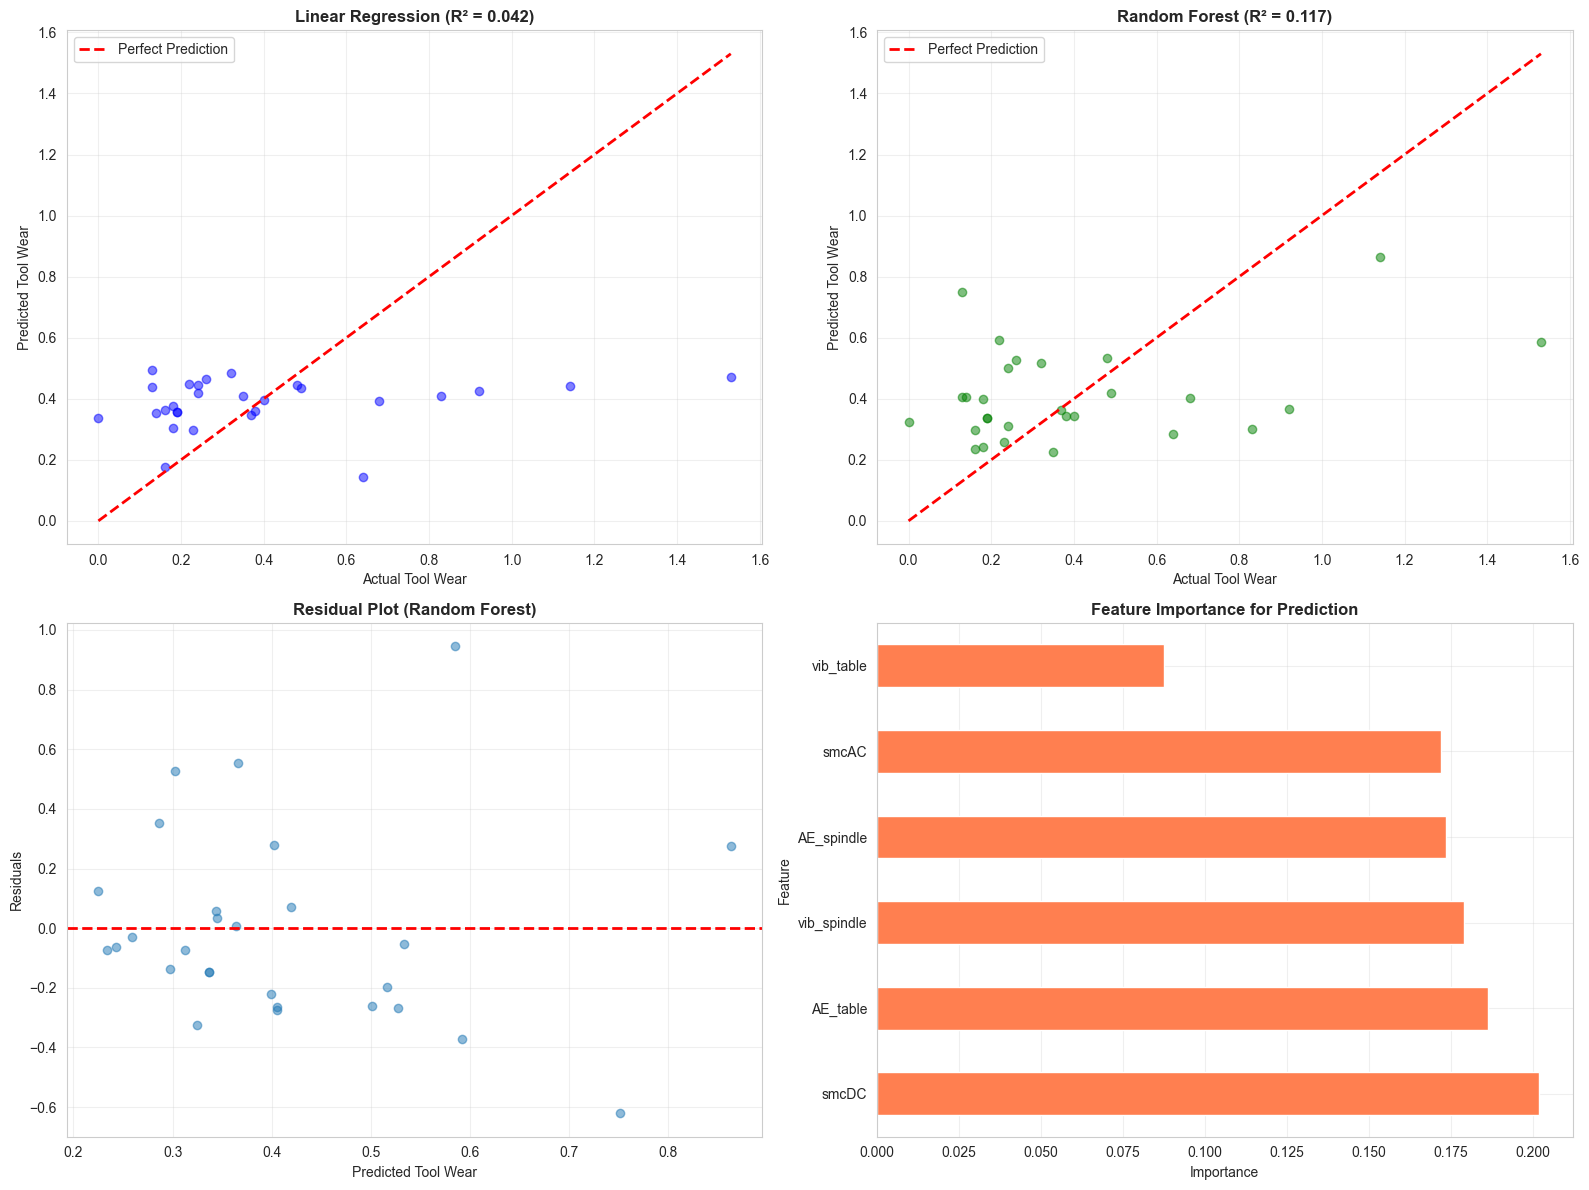

In [32]:
print("ENGINEERING ANALYSIS - QUESTION 4")
print("="*70)
print("Can tool wear be predicted from sensor data?\n")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Prepare data
X = df[sensor_cols].dropna()
y = df.loc[X.index, 'VB']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Evaluation
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R² Score': [r2_score(y_test, lr_pred), r2_score(y_test, rf_pred)],
    'MAE': [mean_absolute_error(y_test, lr_pred), mean_absolute_error(y_test, rf_pred)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, lr_pred)), np.sqrt(mean_squared_error(y_test, rf_pred))]
})

print("Model Performance:")
display(results.round(4))

best_model = 'Linear Regression' if results.iloc[0]['R² Score'] > results.iloc[1]['R² Score'] else 'Random Forest'
best_r2 = results['R² Score'].max()

print(f"\n{'='*70}")
if best_r2 > 0.7:
    print(f"ANSWER: YES, tool wear CAN be predicted with HIGH accuracy")
elif best_r2 > 0.5:
    print(f"ANSWER: YES, tool wear CAN be predicted with MODERATE accuracy")
else:
    print(f"ANSWER: PARTIALLY, prediction is possible but with LIMITED accuracy")
print(f"Best Model: {best_model} (R² = {best_r2:.4f})")
print(f"{'='*70}")

# Feature importance (Random Forest)
feature_importance = pd.DataFrame({
    'Feature': sensor_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance for Prediction:")
display(feature_importance)

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Prediction vs Actual (Linear Regression)
axes[0, 0].scatter(y_test, lr_pred, alpha=0.5, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Tool Wear')
axes[0, 0].set_ylabel('Predicted Tool Wear')
axes[0, 0].set_title(f'Linear Regression (R² = {r2_score(y_test, lr_pred):.3f})', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Prediction vs Actual (Random Forest)
axes[0, 1].scatter(y_test, rf_pred, alpha=0.5, color='green')
axes[0, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual Tool Wear')
axes[0, 1].set_ylabel('Predicted Tool Wear')
axes[0, 1].set_title(f'Random Forest (R² = {r2_score(y_test, rf_pred):.3f})', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Residuals
residuals = y_test - rf_pred
axes[1, 0].scatter(rf_pred, residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Predicted Tool Wear')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residual Plot (Random Forest)', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Feature Importance
feature_importance.plot(x='Feature', y='Importance', kind='barh', ax=axes[1, 1], color='coral', legend=False)
axes[1, 1].set_xlabel('Importance')
axes[1, 1].set_title('Feature Importance for Prediction', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Question 5: If building a Machine Learning model, which features would you select?

ENGINEERING ANALYSIS - QUESTION 5
If building a Machine Learning model, which features would you select?

Feature Selection Analysis:


,Correlation_with_Target,RF_Importance,Variance,Corr_Norm,Importance_Norm,Variance_Norm,Combined_Score
AE_table,0.2147,0.1861,0.0002,0.2044,0.9216,0.0000,0.4504
vib_spindle,0.2015,0.1789,0.0003,0.1910,0.8857,0.0000,0.4307
AE_spindle,0.2011,0.1735,0.0003,0.1905,0.8594,0.0000,0.4200
smcDC,0.0230,0.2019,0.0009,0.0102,1.0000,0.0000,0.4041
smcAC,0.0388,0.1719,0.1178,0.0262,0.8513,0.0002,0.3510
vib_table,0.0327,0.0876,0.0002,0.0200,0.4339,0.0000,0.1816



RECOMMENDED FEATURES FOR ML MODEL:
1. AE_table
   - Combined Score: 0.4504
   - Correlation: 0.2147
   - RF Importance: 0.1861
2. vib_spindle
   - Combined Score: 0.4307
   - Correlation: 0.2015
   - RF Importance: 0.1789
3. AE_spindle
   - Combined Score: 0.4200
   - Correlation: 0.2011
   - RF Importance: 0.1735
4. smcDC
   - Combined Score: 0.4041
   - Correlation: 0.0230
   - RF Importance: 0.2019

RATIONALE:
Selected features based on:
1. Strong correlation with target variable (tool wear)
2. High importance in Random Forest model
3. Sufficient variance to capture patterns
4. Low redundancy (avoiding highly correlated features)

Inter-correlation of selected features:


,AE_table,vib_spindle,AE_spindle,smcDC
AE_table,1.000,-0.030,0.950,-0.171
vib_spindle,-0.030,1.000,-0.067,-0.085
AE_spindle,0.950,-0.067,1.000,-0.148
smcDC,-0.171,-0.085,-0.148,1.000



⚠️ Warning: Some selected features are highly correlated:
   AE_table <-> AE_spindle: 0.950
   Consider removing one to reduce multicollinearity


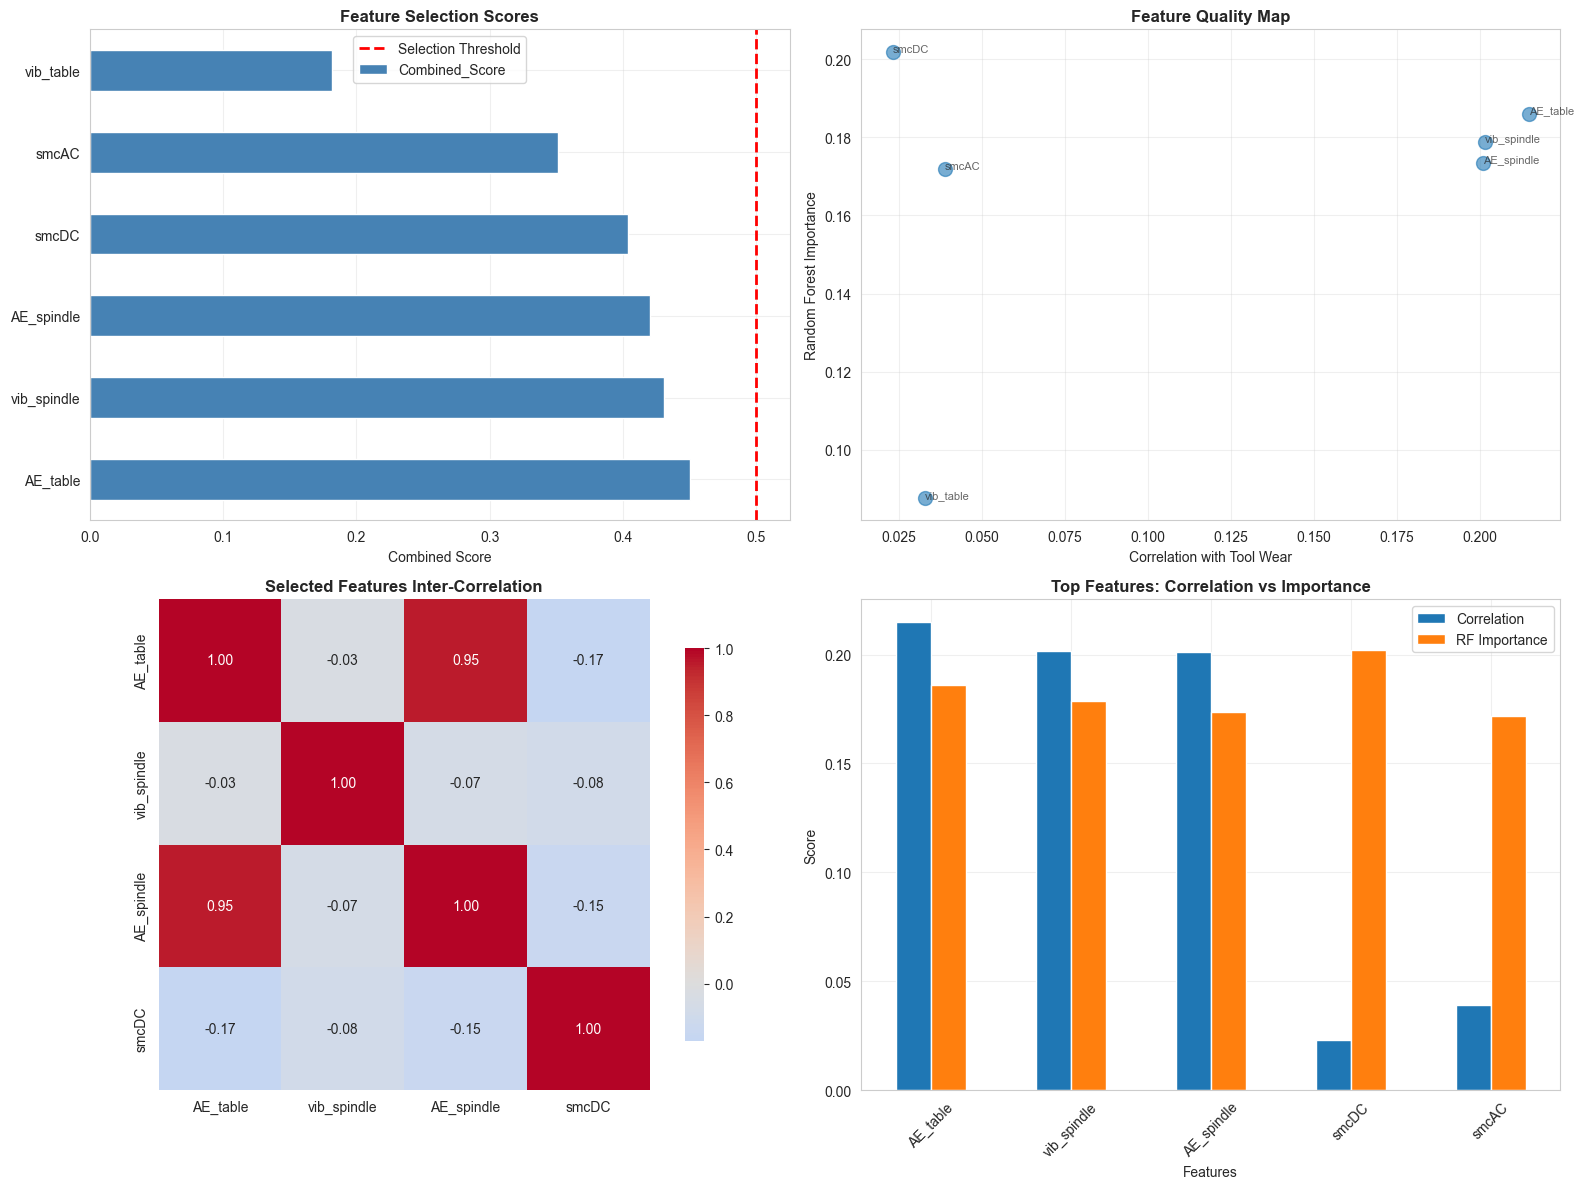


FINAL RECOMMENDATION: Use 4 features: AE_table, vib_spindle, AE_spindle, smcDC


In [33]:
print("ENGINEERING ANALYSIS - QUESTION 5")
print("="*70)
print("If building a Machine Learning model, which features would you select?\n")

# Feature selection based on multiple criteria
feature_analysis = pd.DataFrame({
    'Correlation_with_Target': correlation_matrix['VB'].abs(),
    'RF_Importance': [0] * len(correlation_matrix)  # Initialize
})

# Add Random Forest importance
for i, col in enumerate(sensor_cols):
    feature_analysis.loc[col, 'RF_Importance'] = rf_model.feature_importances_[i]

# Calculate variance (low variance features are less useful)
feature_analysis['Variance'] = df[correlation_matrix.index].var()

# Normalize all metrics to 0-1 scale for comparison
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_analysis[['Corr_Norm', 'Importance_Norm', 'Variance_Norm']] = scaler.fit_transform(
    feature_analysis[['Correlation_with_Target', 'RF_Importance', 'Variance']]
)

# Combined score (weighted average)
feature_analysis['Combined_Score'] = (
    0.4 * feature_analysis['Corr_Norm'] +
    0.4 * feature_analysis['Importance_Norm'] +
    0.2 * feature_analysis['Variance_Norm']
)

# Filter to sensor features only
sensor_features = feature_analysis.loc[sensor_cols].sort_values('Combined_Score', ascending=False)

print("Feature Selection Analysis:")
display(sensor_features.round(4))

# Select top features (combined score > 0.5 or top 4)
selected_features = sensor_features[sensor_features['Combined_Score'] > 0.5].index.tolist()
if len(selected_features) < 3:
    selected_features = sensor_features.head(4).index.tolist()

print(f"\n{'='*70}")
print(f"RECOMMENDED FEATURES FOR ML MODEL:")
print(f"{'='*70}")
for i, feature in enumerate(selected_features, 1):
    score = sensor_features.loc[feature, 'Combined_Score']
    corr = sensor_features.loc[feature, 'Correlation_with_Target']
    importance = sensor_features.loc[feature, 'RF_Importance']
    print(f"{i}. {feature}")
    print(f"   - Combined Score: {score:.4f}")
    print(f"   - Correlation: {corr:.4f}")
    print(f"   - RF Importance: {importance:.4f}")

print(f"\n{'='*70}")
print("RATIONALE:")
print("="*70)
print("Selected features based on:")
print("1. Strong correlation with target variable (tool wear)")
print("2. High importance in Random Forest model")
print("3. Sufficient variance to capture patterns")
print("4. Low redundancy (avoiding highly correlated features)")

# Check redundancy in selected features
if len(selected_features) > 1:
    selected_corr = correlation_matrix.loc[selected_features, selected_features]
    print("\nInter-correlation of selected features:")
    display(selected_corr.round(3))
    
    # Check if any pair is highly correlated
    high_corr_pairs = []
    for i in range(len(selected_features)):
        for j in range(i+1, len(selected_features)):
            corr_val = selected_corr.iloc[i, j]
            if abs(corr_val) > 0.8:
                high_corr_pairs.append((selected_features[i], selected_features[j], corr_val))
    
    if high_corr_pairs:
        print("\n⚠️ Warning: Some selected features are highly correlated:")
        for f1, f2, corr_val in high_corr_pairs:
            print(f"   {f1} <-> {f2}: {corr_val:.3f}")
            print(f"   Consider removing one to reduce multicollinearity")
    else:
        print("\n✓ Selected features have low inter-correlation (good!)")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Combined scores
sensor_features['Combined_Score'].plot(kind='barh', ax=axes[0, 0], color='steelblue')
axes[0, 0].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Selection Threshold')
axes[0, 0].set_xlabel('Combined Score')
axes[0, 0].set_title('Feature Selection Scores', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Correlation vs Importance scatter
axes[0, 1].scatter(sensor_features['Correlation_with_Target'], 
                   sensor_features['RF_Importance'], s=100, alpha=0.6)
for idx, row in sensor_features.iterrows():
    axes[0, 1].annotate(idx, (row['Correlation_with_Target'], row['RF_Importance']), 
                       fontsize=8, alpha=0.7)
axes[0, 1].set_xlabel('Correlation with Tool Wear')
axes[0, 1].set_ylabel('Random Forest Importance')
axes[0, 1].set_title('Feature Quality Map', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Heatmap of selected features
if len(selected_features) > 1:
    sns.heatmap(selected_corr, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, ax=axes[1, 0], cbar_kws={"shrink": 0.8})
    axes[1, 0].set_title('Selected Features Inter-Correlation', fontweight='bold')

# Feature importance comparison
comparison_data = sensor_features[['Correlation_with_Target', 'RF_Importance']].head()
comparison_data.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Top Features: Correlation vs Importance', fontweight='bold')
axes[1, 1].legend(['Correlation', 'RF Importance'])
axes[1, 1].grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print(f"FINAL RECOMMENDATION: Use {len(selected_features)} features: {', '.join(selected_features)}")
print(f"{'='*70}")